In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import lstsq
from scipy.optimize import fmin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns

np.random.seed(12)

In [92]:
# loading the Treasury Bill data
rr = pd.read_csv('Treasury Bill Ratess.csv')

In [93]:
# Arranging the time(date) in ascending order
rr = rr.iloc[::-1,:]
rr.reset_index(drop=True, inplace=True)
# changing time to date format
rr['year']= pd.to_datetime(rr['Issue Date'], dayfirst=True, format='mixed').dt.year



In [94]:
rr

,Issue Date,Tender,Security Type,Discount Rate,Interest Rate,year
0,05 Jun 2017,1540,91 DAY BILL,12.0180,12.3903,2017
1,04 Dec 2017,1566,91 DAY BILL,12.9099,13.3405,2017
2,29 Jan 2018,1574,91 DAY BILL,12.9201,13.3513,2018
3,05 Feb 2018,1575,91 DAY BILL,12.8912,13.3205,2018
4,12 Feb 2018,1576,91 DAY BILL,12.9332,13.3653,2018
...,...,...,...,...,...,...
325,08 Apr 2024,1897,91 DAY BILL,24.1768,25.7321,2024
326,15 Apr 2024,1898,91 DAY BILL,24.1830,25.7391,2024
327,22 Apr 2024,1899,91 DAY BILL,24.1032,25.6487,2024
328,29 Apr 2024,1900,91 DAY BILL,24.0140,25.5478,2024


In [5]:
# subsetting year values greater than 2021
rr = rr[rr['year']>2021]
rr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, 207 to 329
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Issue Date     123 non-null    object 
 1   Tender         123 non-null    int64  
 2   Security Type  123 non-null    object 
 3   Discount Rate  123 non-null    float64
 4   Interest Rate  123 non-null    float64
 5   year           123 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 6.2+ KB


In [6]:
# taking log to reduce the skewness
rr['log Interest rate'] = np.log(rr['Interest Rate'])
rr

/tmp/ipykernel_18924/2790801730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['log Interest rate'] = np.log(rr['Interest Rate'])


,Issue Date,Tender,Security Type,Discount Rate,Interest Rate,year,log Interest rate
207,03 Jan 2022,1779,91 DAY BILL,12.1453,12.5256,2022,2.527775
208,10 Jan 2022,1780,91 DAY BILL,12.1446,12.5249,2022,2.527719
209,17 Jan 2022,1781,91 DAY BILL,12.1412,12.5213,2022,2.527431
210,24 Jan 2022,1782,91 DAY BILL,12.1646,12.5461,2022,2.529410
211,31 Jan 2022,1783,91 DAY BILL,12.2467,12.6335,2022,2.536352
...,...,...,...,...,...,...,...
325,08 Apr 2024,1897,91 DAY BILL,24.1768,25.7321,2024,3.247739
326,15 Apr 2024,1898,91 DAY BILL,24.1830,25.7391,2024,3.248011
327,22 Apr 2024,1899,91 DAY BILL,24.1032,25.6487,2024,3.244493
328,29 Apr 2024,1900,91 DAY BILL,24.0140,25.5478,2024,3.240551


In [7]:
# taking square root to reduce the skewness
rr['square'] = np.sqrt(rr['Interest Rate'])
rr

/tmp/ipykernel_18924/2072040789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['square'] = np.sqrt(rr['Interest Rate'])


,Issue Date,Tender,Security Type,Discount Rate,Interest Rate,year,log Interest rate,square
207,03 Jan 2022,1779,91 DAY BILL,12.1453,12.5256,2022,2.527775,3.539152
208,10 Jan 2022,1780,91 DAY BILL,12.1446,12.5249,2022,2.527719,3.539054
209,17 Jan 2022,1781,91 DAY BILL,12.1412,12.5213,2022,2.527431,3.538545
210,24 Jan 2022,1782,91 DAY BILL,12.1646,12.5461,2022,2.529410,3.542047
211,31 Jan 2022,1783,91 DAY BILL,12.2467,12.6335,2022,2.536352,3.554364
...,...,...,...,...,...,...,...,...
325,08 Apr 2024,1897,91 DAY BILL,24.1768,25.7321,2024,3.247739,5.072682
326,15 Apr 2024,1898,91 DAY BILL,24.1830,25.7391,2024,3.248011,5.073372
327,22 Apr 2024,1899,91 DAY BILL,24.1032,25.6487,2024,3.244493,5.064455
328,29 Apr 2024,1900,91 DAY BILL,24.0140,25.5478,2024,3.240551,5.054483


# FUNCTION FOR ESTIMATING THE PARAMETERS OF THE WHITE NOISE CIR MODEL

In [8]:

# function to estimate parameters
def ols_cir(data, dt):

    # define variables
    Nsteps = len(data)
    rs = data[:Nsteps - 1]  
    rt = data[1:Nsteps]
    
    # model initialization
    model = LinearRegression()

    # feature engineering to fit the theoretical model
    y = (rt - rs) / np.sqrt(rs)
#     print(y)
    z1 = dt / np.sqrt(rs)
    z2 = dt * np.sqrt(rs)
    X = np.column_stack((z1, z2))

    # fit the model
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)

    # calculate the predicted values (y_hat), residuals and the parameters
    y_hat = model.predict(X)
    residuals = y - y_hat
    beta1 = model.coef_[0]        
    beta2 = model.coef_[1]

    # get the parameter of interest for CIR
    k0 = -beta2
    theta0 = beta1/k0
    sigma0 = np.std(residuals)/np.sqrt(dt)
    
    return k0, theta0, sigma0,y_hat

In [ ]:
# assinging variables that will be printed from our ols_cir function
a,b,c,d = ols_cir(np.array(rr['Interest Rate']/100),1/100)
print(f' k0:{a}, theta0:{b}, sigma0:{c}')

# DESCRIPTIVE STATISTICS

In [9]:
# Descriptive Statistics
(rr['Interest Rate']/100).describe()

count    123.000000
mean       0.254433
std        0.066571
min        0.125213
25%        0.203445
50%        0.264987
75%        0.295332
max        0.361825
Name: Interest Rate, dtype: float64

# FUNCTION FOR THE 1000 SIMULATIONS

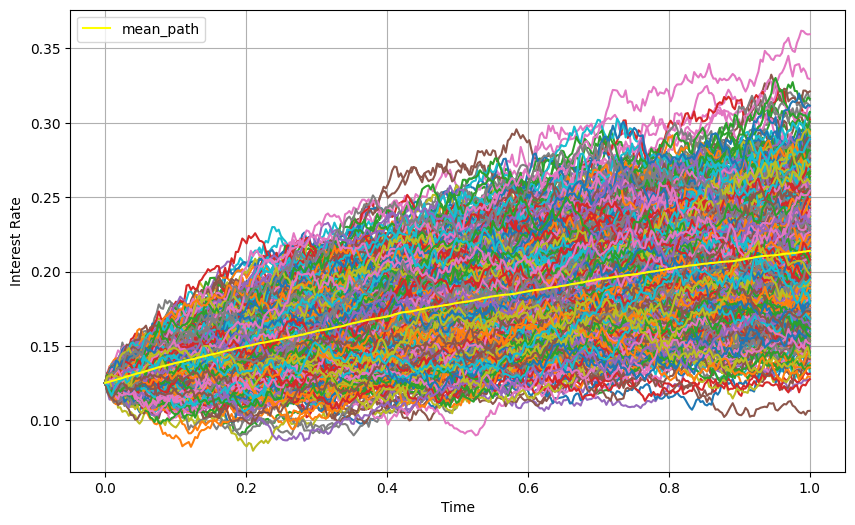

In [11]:
def simulate_CIR(kappa, theta, sigma, r0, T, n_paths, n_steps):
    dt = T / n_paths
    sqrt_dt = np.sqrt(dt)
    r = np.zeros((n_paths, n_steps+1))
    r[:, 0] = r0
    rng = np.random.default_rng(seed=12)

    for i in range(n_steps):
        dW = rng.normal(0, sqrt_dt, size=(n_paths))
#         r[:, i+1] = r[:, i] + kappa * (theta - np.maximum(0, r[:, i])) * dt + sigma * np.sqrt(np.maximum(0, r[:, i])) * dW
        r[:, i+1] = np.maximum(0, r[:, i]) + kappa * (theta - np.maximum(0, r[:, i])) * dt + sigma * np.sqrt(np.maximum(0, r[:, i])) * dW
#     print(r)  
    return r

# Example parameters 
kappa = 2.40
theta = 0.29
sigma = 0.21
r0 = (np.array(rr['Interest Rate'])/100)[0]  
T = 1
n_paths = 1000
n_steps = 329
# Simulate paths
paths = simulate_CIR(kappa, theta, sigma, r0, T, n_paths, n_steps)
mean_path = np.mean(paths, axis=0)
# print(paths[:5])
# mse_paths = 1/len(data)*np.mean((paths - data)**2, axis=1)


# Plot the paths
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(np.linspace(0, T, n_steps+1), paths[i])
plt.plot(np.linspace(0, T, n_steps+1),mean_path, color = 'yellow', label = 'mean_path')

# plt.title('Simulated Paths for the CIR Model')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.grid(True)
# plt.show()

# Add legend
plt.legend()
plt.savefig('g.png')

# SUBSETTING FOR TIME SERIES PLOT

In [12]:
# subsetting all the rows excluding the last one
kkk = rr.iloc[:-1,:] 
kkk

,Issue Date,Tender,Security Type,Discount Rate,Interest Rate,year,log Interest rate,square
207,03 Jan 2022,1779,91 DAY BILL,12.1453,12.5256,2022,2.527775,3.539152
208,10 Jan 2022,1780,91 DAY BILL,12.1446,12.5249,2022,2.527719,3.539054
209,17 Jan 2022,1781,91 DAY BILL,12.1412,12.5213,2022,2.527431,3.538545
210,24 Jan 2022,1782,91 DAY BILL,12.1646,12.5461,2022,2.529410,3.542047
211,31 Jan 2022,1783,91 DAY BILL,12.2467,12.6335,2022,2.536352,3.554364
...,...,...,...,...,...,...,...,...
324,01 Apr 2024,1896,91 DAY BILL,24.1920,25.7493,2024,3.248407,5.074377
325,08 Apr 2024,1897,91 DAY BILL,24.1768,25.7321,2024,3.247739,5.072682
326,15 Apr 2024,1898,91 DAY BILL,24.1830,25.7391,2024,3.248011,5.073372
327,22 Apr 2024,1899,91 DAY BILL,24.1032,25.6487,2024,3.244493,5.064455


In [14]:
# constructing a dataframe of the predicted interest rates
tmp_df = pd.DataFrame(
    {
        'timestamp': kkk['Issue Date'],
        'predicted rate': np.cumsum(d)+ r0
    }
).set_index('timestamp')
tmp_df

,predicted rate
timestamp,
03 Jan 2022,0.137009
10 Jan 2022,0.148762
17 Jan 2022,0.160519
24 Jan 2022,0.172248
31 Jan 2022,0.183878
...,...
01 Apr 2024,0.443296
08 Apr 2024,0.445247
15 Apr 2024,0.447195


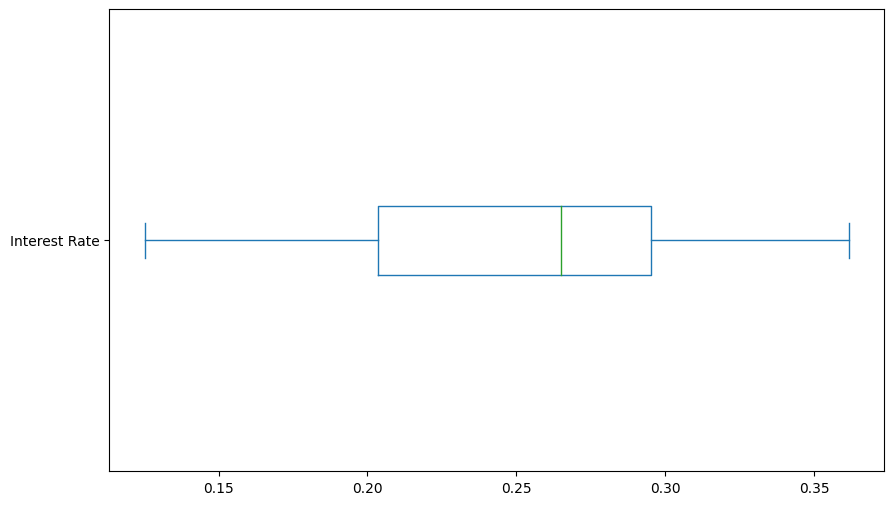

In [15]:
# boxplot of the data
fig, ax = plt.subplots(figsize=(10, 6))
(rr["Interest Rate"]/100).plot(kind = "box", vert = False,  ax=ax)
plt.grid(False)
plt.savefig('Box')

# FUNCTION TO SIMULATE INTEREST RATE PATHS

In [16]:
# function to simulate paths
def simulate_cir(k, theta, sigma, r0, T, N):

    # populate an empty array
    dt = T / N
    interest_rate_paths = np.zeros(N+1)
    interest_rate_paths[0] = r0 
    for t in range(1, N+1):
        Z = np.random.randn()
        r = interest_rate_paths[t-1]
        interest_rate_paths[t] = r + k * (theta-r) * dt + sigma * np.sqrt(dt) * np.sqrt(max(0, r)) * Z    
    return interest_rate_paths

In [18]:
k_true = 2.3999503050143196  # True mean reversion speed
theta_true = 0.2985680586886948 # True long-run mean
sigma_true = 0.21267601614865567 # True volatility of interest rates
r0_true = r0 # True initial interest rate
T = 1  # Time horizon
N = 122  # Number of time steps
dt = T/N
# simulated path
np.random.seed(123)
series = simulate_cir(k_true, theta_true, sigma_true, r0_true, T, N)

# THE SIMULATED PATHS

In [81]:
series


array([0.125256  , 0.12126725, 0.13144244, 0.13670551, 0.12916601,
       0.12849446, 0.14323847, 0.12861006, 0.1289917 , 0.14108206,
       0.13791158, 0.13621757, 0.13873823, 0.15257852, 0.15064509,
       0.15023696, 0.14991322, 0.16928314, 0.18915054, 0.1997111 ,
       0.20497884, 0.21324792, 0.22818134, 0.22095846, 0.23312754,
       0.22275774, 0.21845335, 0.22819283, 0.21643635, 0.2167973 ,
       0.21067997, 0.21014974, 0.18718651, 0.17461965, 0.17142665,
       0.18132165, 0.18220444, 0.18451691, 0.19245276, 0.18711082,
       0.19166568, 0.18697966, 0.17479024, 0.17407841, 0.18113707,
       0.18622184, 0.18833358, 0.21049287, 0.21587313, 0.22625584,
       0.24817704, 0.23675516, 0.22823883, 0.24566247, 0.2390869 ,
       0.24053646, 0.25177604, 0.2613021 , 0.27930784, 0.2949065 ,
       0.30616049, 0.29777869, 0.30614597, 0.30934507, 0.29492972,
       0.30982168, 0.31825188, 0.31835879, 0.31543712, 0.30214659,
       0.30418795, 0.30905205, 0.29994895, 0.31217767, 0.30010

# MEAN SQUARE ERROR COMPUTATION

In [82]:
# computing the mean_squared_error of White noise
MSE = (np.sum(((rr['Interest Rate']/100)-series)**2))/len(series)

In [24]:
SSE = np.sum(((rr['Interest Rate']/100)-series)**2)
SST = np.sum((rr['Interest Rate']/100-np.mean(rr['Interest Rate']/100))**2)
SSE/SST

1.1377045122359404

In [25]:
# calculation of the skewness
stats.skew(rr['Interest Rate']/100)

-0.3840215314973844

In [26]:
# constructing a dataframe of the simulated path
tmp_d = pd.DataFrame(
    {
        'timestamp': rr['Issue Date'],
        'Actual rate': np.array(rr['Interest Rate']/100),
        'Simulated': series
    }
).set_index('timestamp')
tmp_d

,Actual rate,Simulated
timestamp,,
03 Jan 2022,0.125256,0.125256
10 Jan 2022,0.125249,0.121267
17 Jan 2022,0.125213,0.131442
24 Jan 2022,0.125461,0.136706
31 Jan 2022,0.126335,0.129166
...,...,...
08 Apr 2024,0.257321,0.274543
15 Apr 2024,0.257391,0.294784
22 Apr 2024,0.256487,0.273688


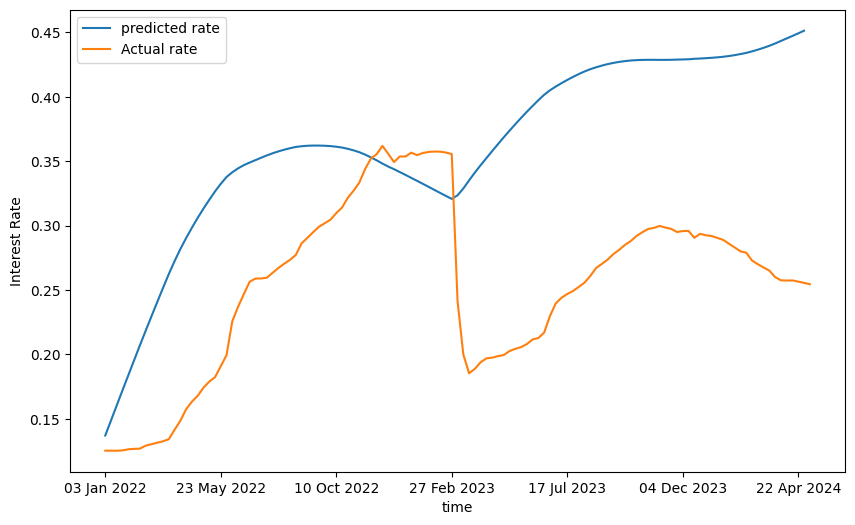

In [27]:
# plotting the predicted rates
fig, ax = plt.subplots(figsize=(10, 6))
tmp_df["predicted rate"].plot(xlabel = "time", ylabel="Predicted Interest Rate", ax=ax)
tmp_d["Actual rate"].plot(xlabel = "time", ylabel="Interest Rate",  ax=ax)
plt.legend()
plt.grid(False)
plt.savefig('Pred')

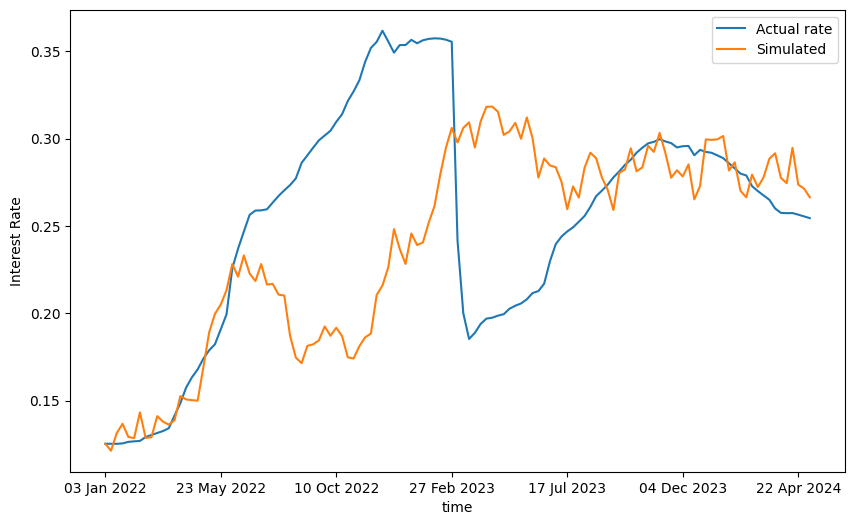

In [28]:
# plot of the actual rate versus the simulated rate
fig, ax = plt.subplots(figsize=(10, 6))
tmp_d["Actual rate"].plot(xlabel = "time", ylabel="Interest Rate",  ax=ax)
tmp_d['Simulated'].plot(xlabel = "time", ylabel="Interest Rate",  ax=ax)
plt.legend()
plt.grid(False)
plt.savefig('combined')

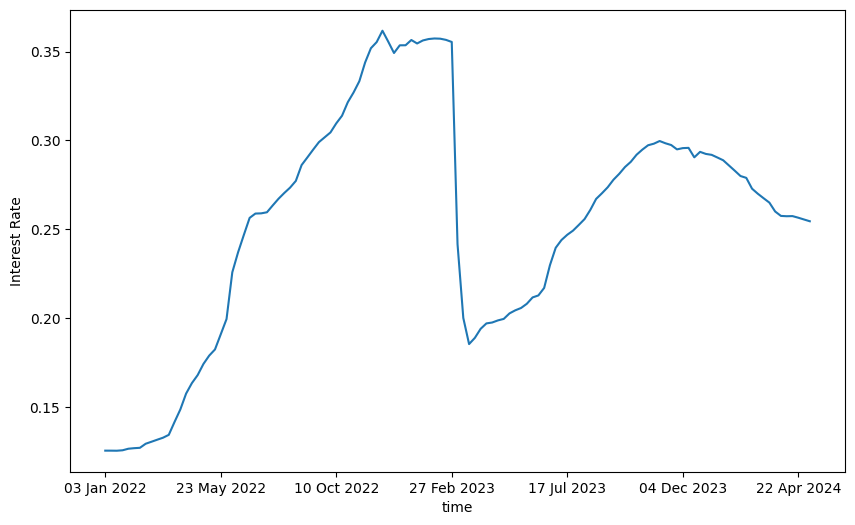

In [140]:
# plot of the observed interest rate
fig, ax = plt.subplots(figsize=(10, 6))
tmp_d["Actual rate"].plot(xlabel = "time", ylabel="Interest Rate",  ax=ax)
plt.grid(False)
plt.savefig('d')

In [29]:
# checking the version of the pandas being used
import matplotlib
pd.__version__

'2.2.2'

In [30]:
rr

,Issue Date,Tender,Security Type,Discount Rate,Interest Rate,year,log Interest rate,square
207,03 Jan 2022,1779,91 DAY BILL,12.1453,12.5256,2022,2.527775,3.539152
208,10 Jan 2022,1780,91 DAY BILL,12.1446,12.5249,2022,2.527719,3.539054
209,17 Jan 2022,1781,91 DAY BILL,12.1412,12.5213,2022,2.527431,3.538545
210,24 Jan 2022,1782,91 DAY BILL,12.1646,12.5461,2022,2.529410,3.542047
211,31 Jan 2022,1783,91 DAY BILL,12.2467,12.6335,2022,2.536352,3.554364
...,...,...,...,...,...,...,...,...
325,08 Apr 2024,1897,91 DAY BILL,24.1768,25.7321,2024,3.247739,5.072682
326,15 Apr 2024,1898,91 DAY BILL,24.1830,25.7391,2024,3.248011,5.073372
327,22 Apr 2024,1899,91 DAY BILL,24.1032,25.6487,2024,3.244493,5.064455
328,29 Apr 2024,1900,91 DAY BILL,24.0140,25.5478,2024,3.240551,5.054483


In [31]:
# creating a dataframe of the log interest rate
df=pd.DataFrame({'timestamp': rr['Issue Date'], 'Interest':rr['log Interest rate']/100}).set_index('timestamp')

In [32]:
df

,Interest
timestamp,
03 Jan 2022,0.025278
10 Jan 2022,0.025277
17 Jan 2022,0.025274
24 Jan 2022,0.025294
31 Jan 2022,0.025364
...,...
08 Apr 2024,0.032477
15 Apr 2024,0.032480
22 Apr 2024,0.032445


123


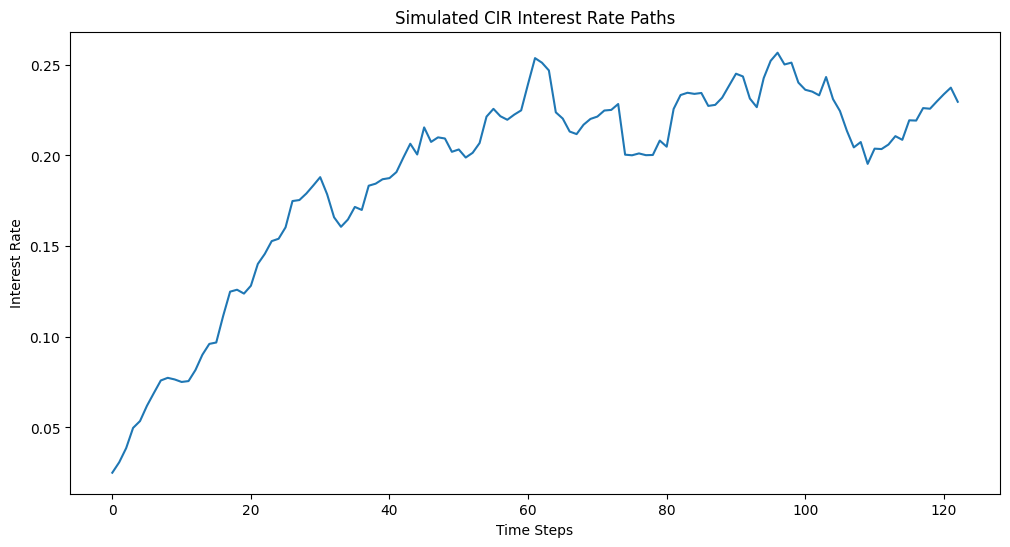

In [42]:
import numpy as np

def simulate_cir_paths(k, theta, sigma, r0, T, N, num_paths):
    dt = T / N
    interest_rate_paths = np.zeros((num_paths, N+1))
    interest_rate_paths[:, 0] = r0
    
    for path in range(num_paths):
        for t in range(1, N+1):
            Z = np.random.randn()
            r = interest_rate_paths[path, t-1]
            interest_rate_paths[path, t] = r + k * (theta - r) * dt + sigma * np.sqrt(dt) * np.sqrt(max(0, r)) * Z
    
    return interest_rate_paths

# Parameters
k = 2.40      # Speed of reversion
theta = 0.30  # Long-term mean
sigma = 0.21  # Volatility
r0 = 0.025     # Initial interest rate
T = 1.0       # Total time period
N = 122       # Number of time steps
num_paths = 1000 # Number of paths

# Simulate the paths
paths = simulate_cir_paths(k, theta, sigma, r0, T, N, num_paths)
mean_path = np.mean(paths, axis=0)
print(len(mean_path))
# Example: Plot the first 10 paths
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(1):
    plt.plot(paths[i])
plt.title('Simulated CIR Interest Rate Paths')
plt.xlabel('Time Steps')
plt.ylabel('Interest Rate')
plt.show()


In [43]:
# adding mean_path to the dataframe tmp_d
tmp_d['mean_paths'] = mean_path

In [44]:
tmp_d

,Actual rate,Simulated,mean_paths
timestamp,,,
03 Jan 2022,0.125256,0.125256,0.025000
10 Jan 2022,0.125249,0.121267,0.030439
17 Jan 2022,0.125213,0.131442,0.035808
24 Jan 2022,0.125461,0.136706,0.041079
31 Jan 2022,0.126335,0.129166,0.046207
...,...,...,...
08 Apr 2024,0.257321,0.274543,0.275397
15 Apr 2024,0.257391,0.294784,0.275780
22 Apr 2024,0.256487,0.273688,0.275932


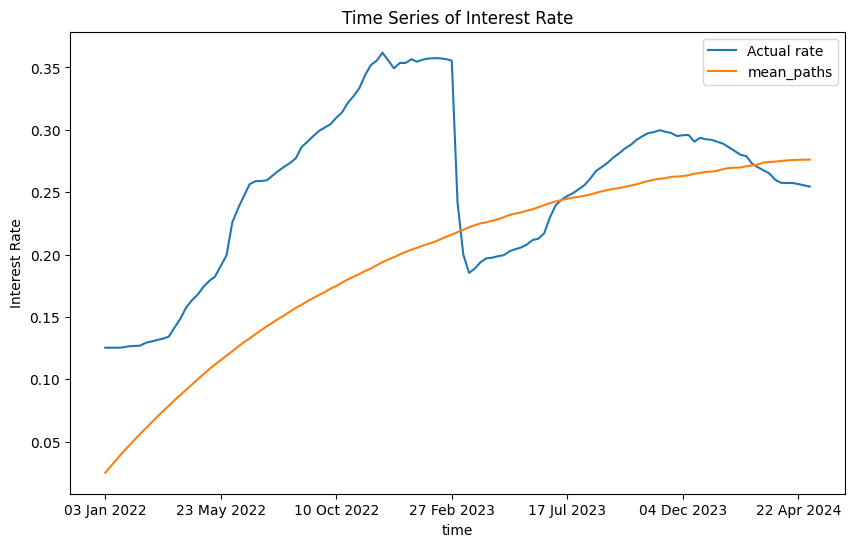

In [45]:
# plot of the actual rate versus the mean_
fig, ax = plt.subplots(figsize=(10, 6))
tmp_d["Actual rate"].plot(xlabel = "time", ylabel="Interest Rate", title = "Time Series of Interest Rate", ax=ax)
tmp_d['mean_paths'].plot(xlabel = "time", ylabel="Interest Rate", title = "Time Series of Interest Rate", ax=ax)
plt.legend()
plt.grid(False)
plt.savefig('combined')

The code below is for the OLS of the colored Noise

The code below is for the sensitivity analysis.

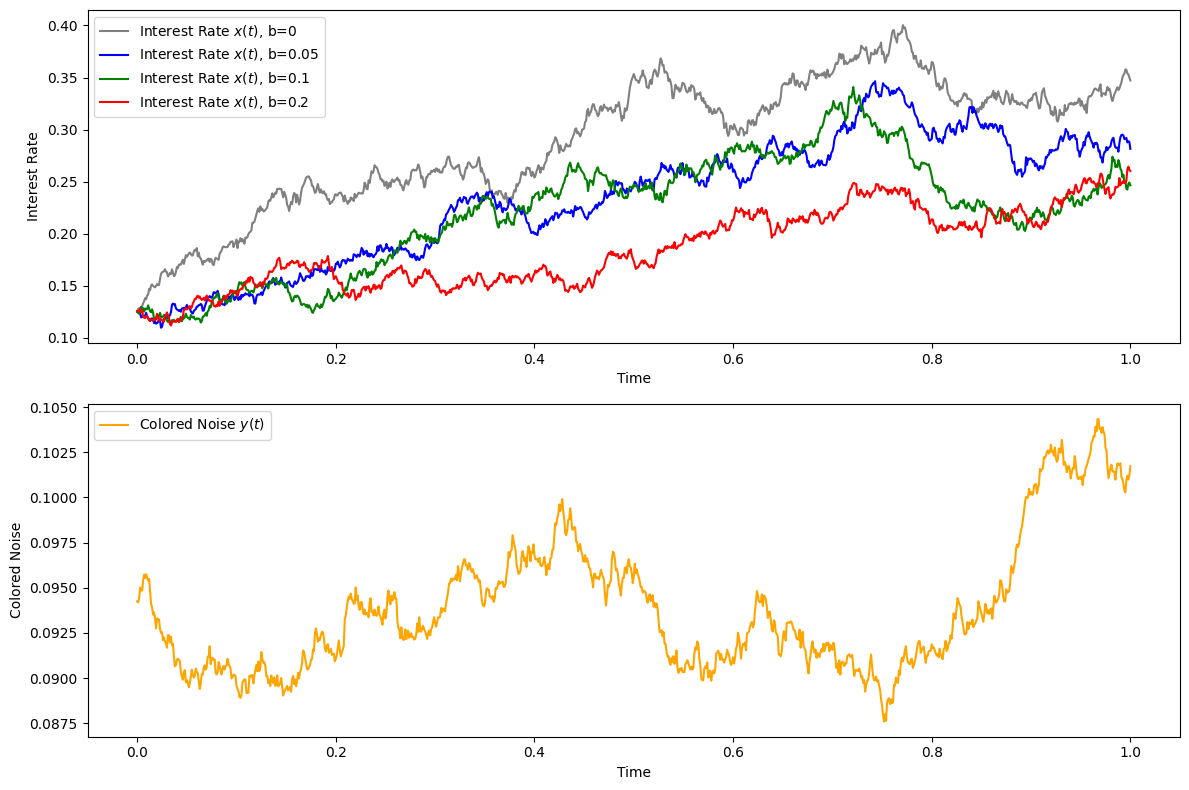

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 2.4
beta = 0.29
sigma = 0.21
c = 0.002
s = 0.012

# Simulation parameters
T = 1.0  # Total time
dt = 0.001  # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions
np.random.seed(42)  # For reproducibility
x0 = np.array(rr['Interest Rate'] /100)[0]# Initial interest rate
y0 = np.random.normal(0, np.sqrt(s**2 / (2 * c)))  # Initial colored noise

# Values of b to test
b_values = [0,0.05, 0.1, 0.2]
colors = ['grey','blue', 'green', 'red']

# Store y(t) which is the same for all b values
y = np.zeros(N+1)
t = np.linspace(0, T, N+1)
y[0] = y0

# Simulate y(t) using Euler-Maruyama method
for n in range(N):
    eta_n = np.random.normal(0, 1)
    y[n+1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n

plt.figure(figsize=(12, 8))

for idx, b in enumerate(b_values):
    # Initialize arrays to store the results
    x = np.zeros(N+1)

    # Set initial condition
    x[0] = x0

    # Simulate the SDEs using Euler-Maruyama method
    for n in range(N):
        xi_n = np.random.normal(0, 1)
        x[n+1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n

    # Plot x(t) results
    plt.subplot(2, 1, 1)
    plt.plot(t, x, label=f'Interest Rate $x(t)$, b={b}', color=colors[idx])
    plt.xlabel('Time')
    plt.ylabel('Interest Rate')
    plt.legend()

# Plot y(t) results
plt.subplot(2, 1, 2)
plt.plot(t, y, label='Colored Noise $y(t)$', color='orange')
plt.xlabel('Time')
plt.ylabel('Colored Noise')
plt.legend()

plt.tight_layout()
plt.savefig('doc')


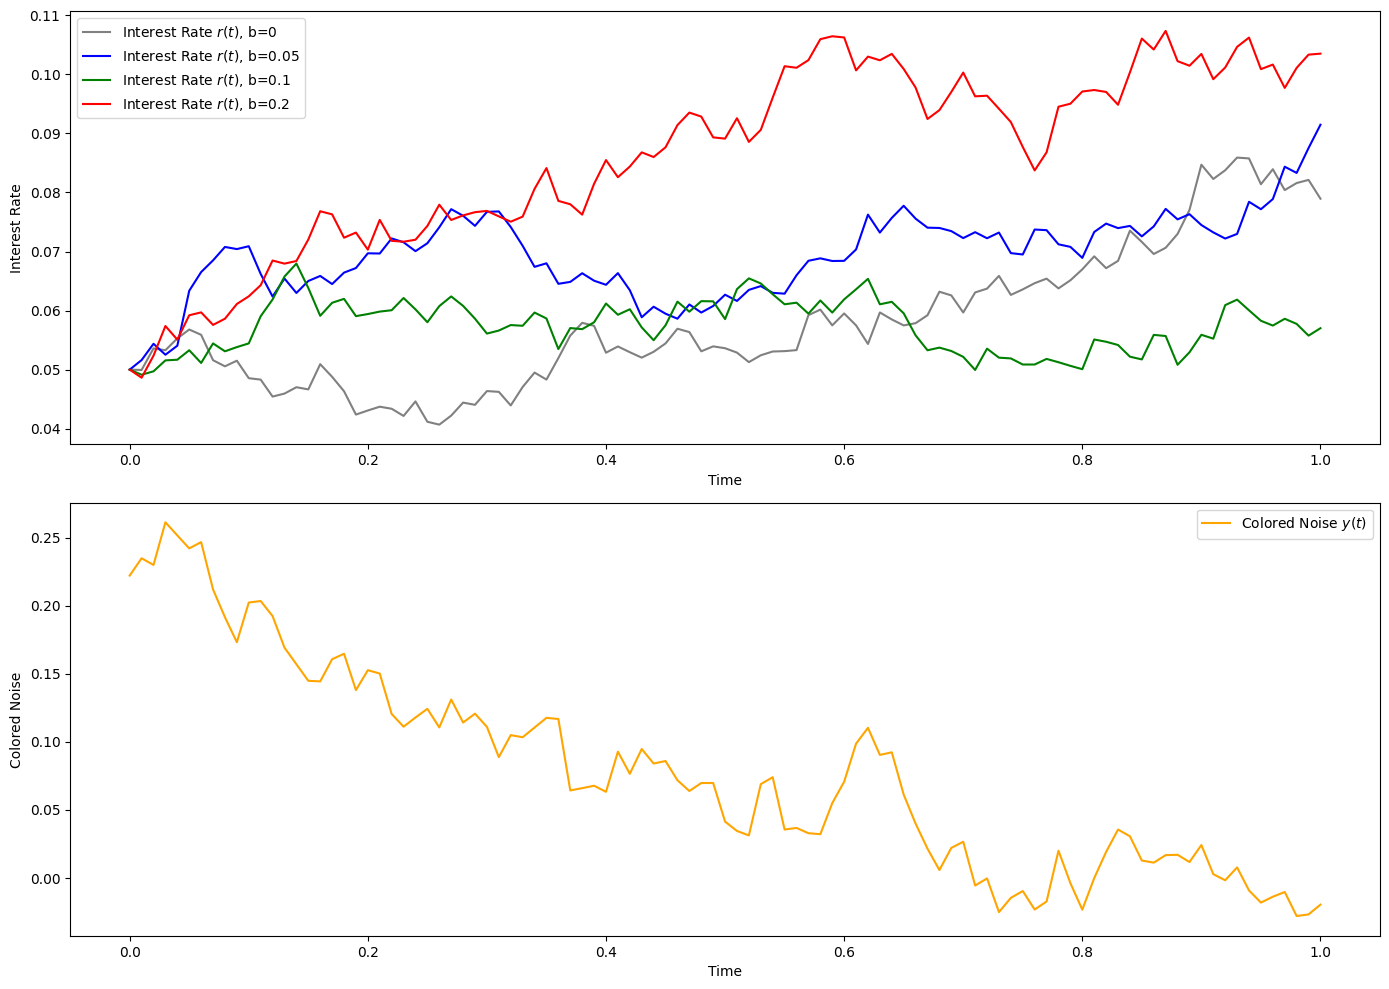

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 0.5     # Speed of mean reversion
theta = 0.1  # Long-term mean
sigma = 0.1  # Volatility of interest rate
c = 0.1      # Speed of mean reversion for y(t)
s = 0.2      # Volatility of y(t)
T = 1.0      # Total time
dt = 0.01    # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions
np.random.seed(42)  # For reproducibility
r0 = 0.05  # Initial interest rate
y0 = np.random.normal(0, np.sqrt(s**2 / (2 * c)))  # Initial colored noise

# Values of b to test
b_values = [0, 0.05, 0.1, 0.2]
colors = ['grey', 'blue', 'green', 'red']

# Function to simulate CIR model with colored noise
def simulate_cir_with_noise(k, theta, sigma, b, c, s, r0, y0, N, dt):
    r = np.zeros(N+1)
    y = np.zeros(N+1)
    r[0] = r0
    y[0] = y0
    for n in range(N):
        dZ = np.random.normal(0, np.sqrt(dt))
        dW = np.random.normal(0, np.sqrt(dt))
        y[n+1] = y[n] - c * y[n] * dt + s * dW
        r[n+1] = r[n] + k * (theta - r[n]) * dt + b * y[n] * dt + sigma * np.sqrt(np.abs(r[n])) * dZ
    return r, y

# Plot the results
plt.figure(figsize=(14, 10))

for idx, b in enumerate(b_values):
    r, y = simulate_cir_with_noise(k, theta, sigma, b, c, s, r0, y0, N, dt)
    t = np.linspace(0, T, N+1)
    
    # Plot r(t) results
    plt.subplot(2, 1, 1)
    plt.plot(t, r, label=f'Interest Rate $r(t)$, b={b}', color=colors[idx])
    plt.xlabel('Time')
    plt.ylabel('Interest Rate')
    plt.legend()
    
    # Plot y(t) results
    if idx == 0:  # Plot y(t) once since it's the same for all b values
        plt.subplot(2, 1, 2)
        plt.plot(t, y, label='Colored Noise $y(t)$', color='orange')
        plt.xlabel('Time')
        plt.ylabel('Colored Noise')
        plt.legend()

plt.tight_layout()
plt.show()


# SENSITIVITY ANALYSIS

MSE for b=0.05, c=0.002, s=0.01: 0.009596140587855602
MSE for b=0.05, c=0.002, s=0.02: 0.01987960576927096
MSE for b=0.05, c=0.004, s=0.01: 0.01266164814137208
MSE for b=0.05, c=0.004, s=0.02: 0.013287489416144237
MSE for b=0.1, c=0.002, s=0.01: 0.0153321389465869
MSE for b=0.1, c=0.002, s=0.02: 0.017172657721372504
MSE for b=0.1, c=0.004, s=0.01: 0.008324329865762462
MSE for b=0.1, c=0.004, s=0.02: 0.018572508638594915


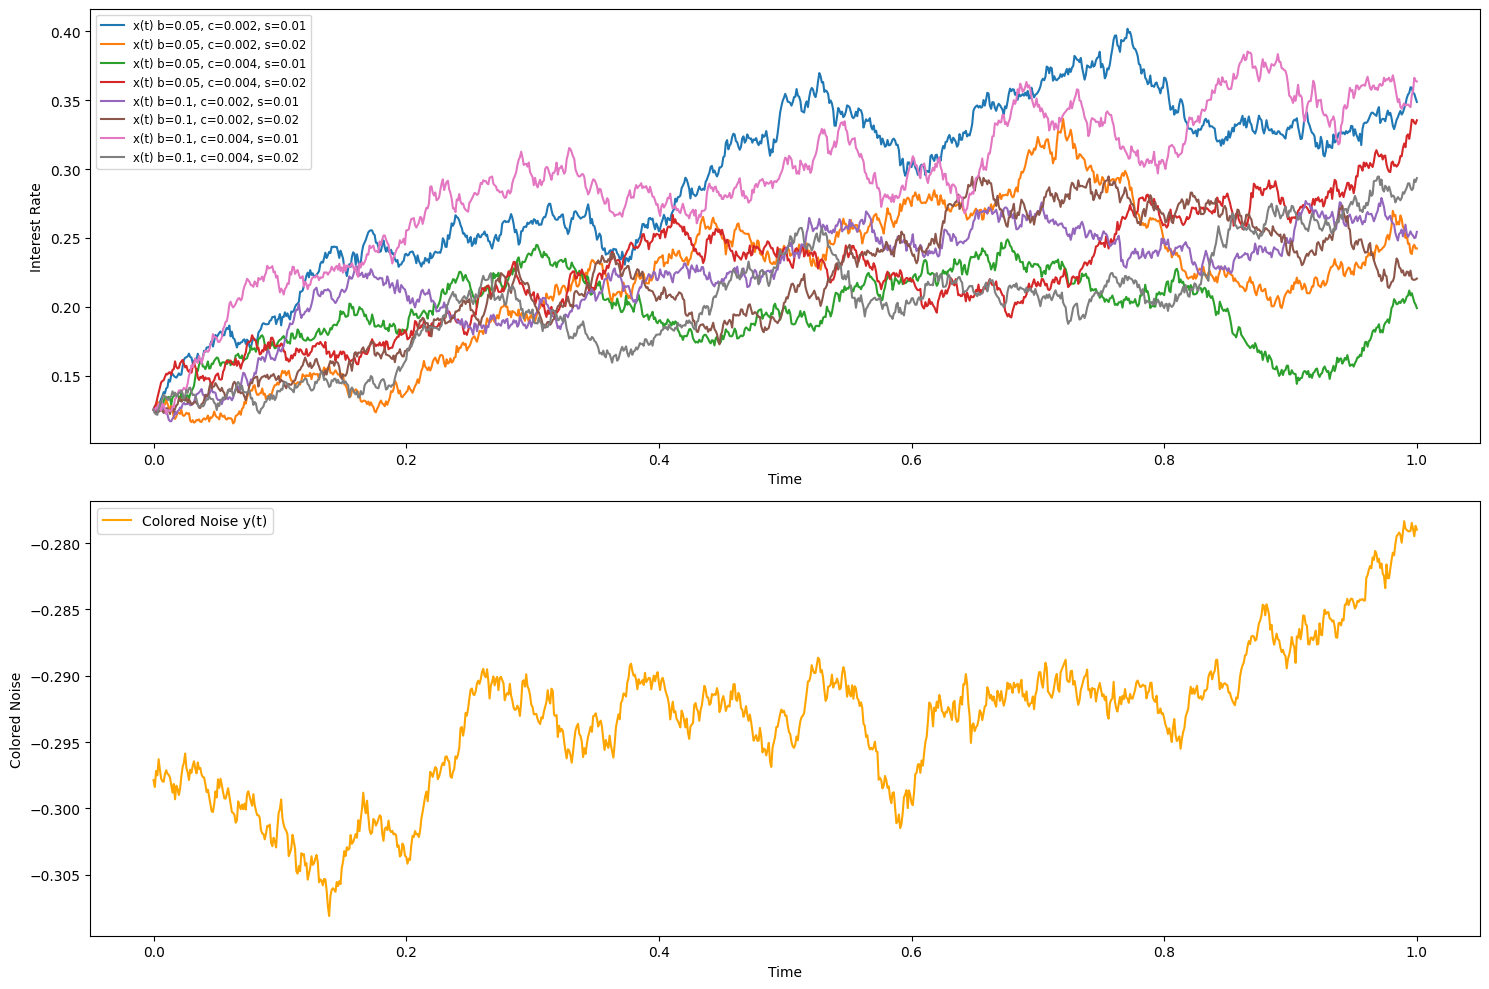

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd  # Assuming you have the rr DataFrame with the Interest Rate data

# # Example data for Interest Rate
# rr = pd.DataFrame({'Interest Rate': np.random.rand(123) * 10})

# Parameters
alpha = 2.4
beta = 0.29
sigma = 0.21

# Simulation parameters
T = 1.0  # Total time
dt = 0.001  # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions
np.random.seed(42)  # For reproducibility
x0 = np.array(rr['Interest Rate'] / 100)[0]  # Initial interest rate

# Values of b, c, and s to test (reduced)
b_values = [0.05, 0.1]
c_values = [0.002, 0.004]
s_values = [0.01, 0.02]

# Assuming observed data is available
observed_data = np.array(rr['Interest Rate'] / 100)

# Make sure to match the lengths
observed_length = len(observed_data)
simulated_length = min(N + 1, observed_length)

# Function to simulate y(t) using Euler-Maruyama method
def simulate_y(c, s):
    y = np.zeros(N + 1)
    y[0] = np.random.normal(0, np.sqrt(s**2 / (2 * c)))
    for n in range(N):
        eta_n = np.random.normal(0, 1)
        y[n + 1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n
    return y

# Function to simulate x(t) using Euler-Maruyama method
def simulate_x(b, y):
    x = np.zeros(N + 1)
    x[0] = x0
    for n in range(N):
        xi_n = np.random.normal(0, 1)
        x[n + 1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n
    return x

plt.figure(figsize=(15, 10))
for idx_b, b in enumerate(b_values):
    for idx_c, c in enumerate(c_values):
        for idx_s, s in enumerate(s_values):
            # Simulate y(t)
            y = simulate_y(c, s)
            
            # Simulate x(t)
            x = simulate_x(b, y)
            
            # Calculate the MSE
            mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
            print(f'MSE for b={b}, c={c}, s={s}: {mse}')
            
            # Plot x(t) results
            plt.subplot(2, 1, 1)
            plt.plot(np.linspace(0, T, N + 1), x, label=f'x(t) b={b}, c={c}, s={s}')
            
plt.subplot(2, 1, 1)
plt.xlabel('Time')
plt.ylabel('Interest Rate')
# plt.title('Sensitivity Analysis on Interest Rate Model')
plt.legend(fontsize='small')

# Plot y(t) results for the last c and s
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, T, N + 1), y, label='Colored Noise y(t)', color='orange')
plt.xlabel('Time')
plt.ylabel('Colored Noise')
plt.legend()

plt.tight_layout()
plt.savefig('color')


MSE for b=0.05, c=0.004, s=0.02: 0.009580905409631042
MSE for b=0.1, c=0.004, s=0.02: 0.019896753570638755
MSE for b=0.15, c=0.004, s=0.02: 0.01266256898946943
MSE for b=0.2, c=0.004, s=0.02: 0.013498448179532534


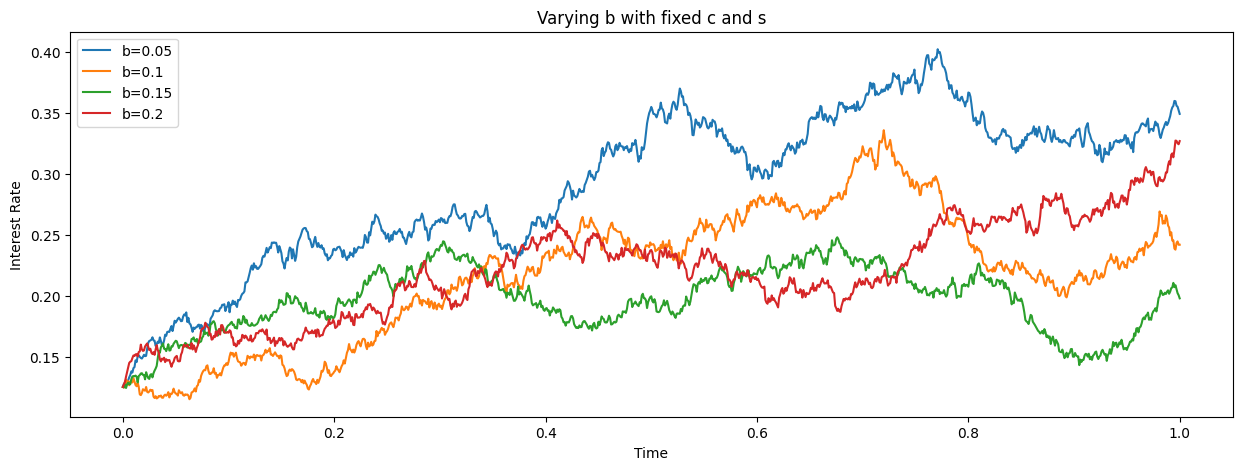

MSE for b=0.1, c=0.004, s=0.01: 0.015407117595958343
MSE for b=0.1, c=0.004, s=0.02: 0.017073084923803366
MSE for b=0.1, c=0.004, s=0.03: 0.008214050388033682
MSE for b=0.1, c=0.004, s=0.04: 0.01900404916381383


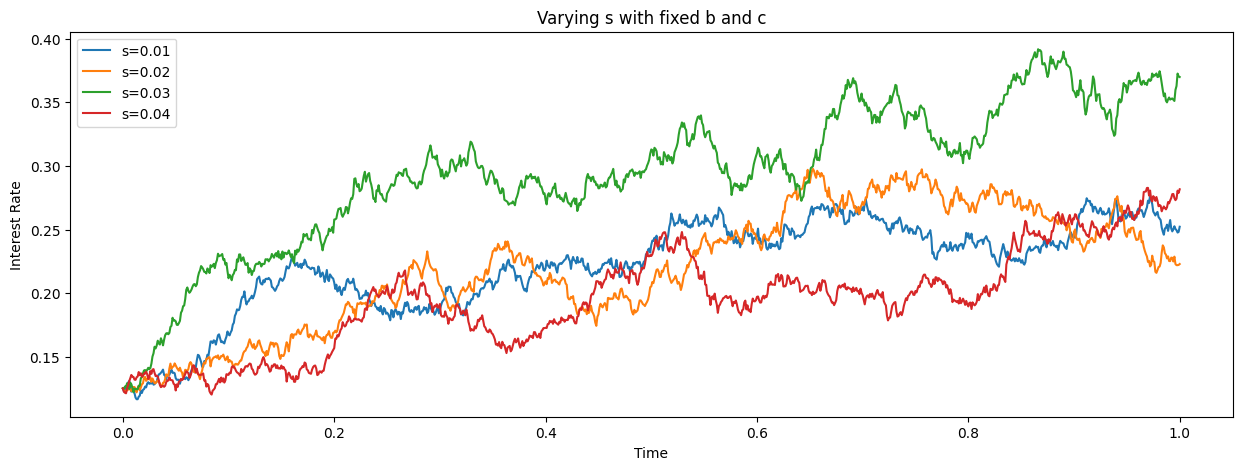

MSE for b=0.1, c=0.002, s=0.02: 0.01595676477035516
MSE for b=0.1, c=0.004, s=0.02: 0.013878750007255814
MSE for b=0.1, c=0.006, s=0.02: 0.012921785942200436
MSE for b=0.1, c=0.008, s=0.02: 0.01930922462886926


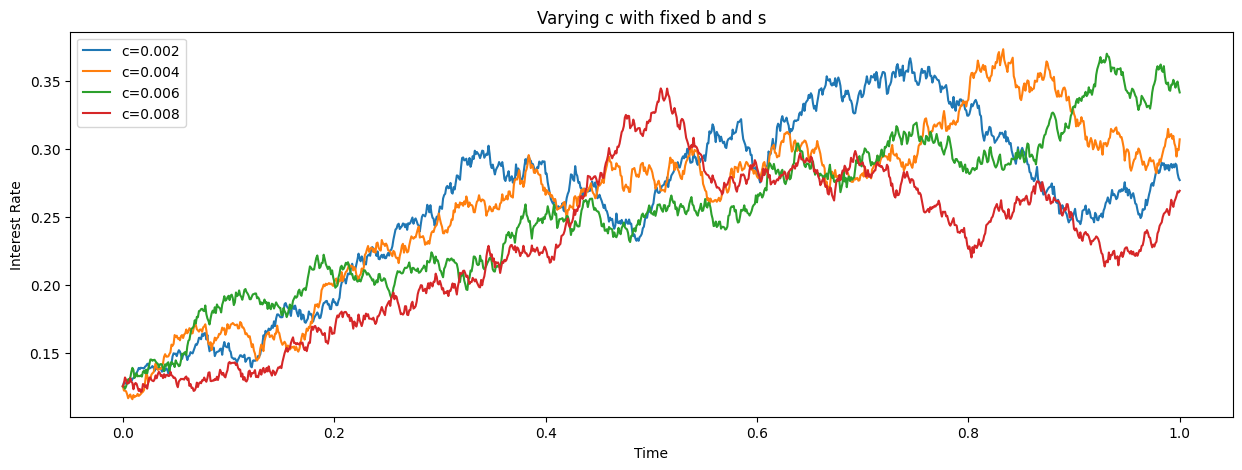

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd  # Assuming you have the rr DataFrame with the Interest Rate data

# Parameters
alpha = 2.4
beta = 0.29
sigma = 0.21

# Simulation parameters
T = 1.0  # Total time
dt = 0.001  # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions
np.random.seed(42)  # For reproducibility
x0 = np.array(rr['Interest Rate'] / 100)[0]  # Initial interest rate

# Values of b, c, and s to test (reduced)
b_values = [0.05, 0.1, 0.15, 0.2]
c_values = [0.002, 0.004, 0.006, 0.008]
s_values = [0.01, 0.02, 0.03, 0.04]

# Assuming observed data is available
observed_data = np.array(rr['Interest Rate'] / 100)

# Make sure to match the lengths
observed_length = len(observed_data)
simulated_length = min(N + 1, observed_length)

# Function to simulate y(t) using Euler-Maruyama method
def simulate_y(c, s):
    y = np.zeros(N + 1)
    y[0] = np.random.normal(0, np.sqrt(s**2 / (2 * c)))
    for n in range(N):
        eta_n = np.random.normal(0, 1)
        y[n + 1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n
    return y

# Function to simulate x(t) using Euler-Maruyama method
def simulate_x(b, y):
    x = np.zeros(N + 1)
    x[0] = x0
    for n in range(N):
        xi_n = np.random.normal(0, 1)
        x[n + 1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n
    return x

# Scenario 1: Varying b while keeping c and s fixed
plt.figure(figsize=(15, 5))
fixed_c = 0.004
fixed_s = 0.02
for b in b_values:
    y = simulate_y(fixed_c, fixed_s)
    x = simulate_x(b, y)
    mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
    print(f'MSE for b={b}, c={fixed_c}, s={fixed_s}: {mse}')
    plt.plot(np.linspace(0, T, N + 1), x, label=f'b={b}')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Varying b with fixed c and s')
plt.legend()
plt.savefig('varying_b.png')
plt.show()

# Scenario 2: Varying s while keeping b and c fixed
plt.figure(figsize=(15, 5))
fixed_b = 0.1
fixed_c = 0.004
for s in s_values:
    y = simulate_y(fixed_c, s)
    x = simulate_x(fixed_b, y)
    mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
    print(f'MSE for b={fixed_b}, c={fixed_c}, s={s}: {mse}')
    plt.plot(np.linspace(0, T, N + 1), x, label=f's={s}')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Varying s with fixed b and c')
plt.legend()
plt.savefig('varying_s.png')
plt.show()

# Scenario 3: Varying c while keeping b and s fixed
plt.figure(figsize=(15, 5))
fixed_b = 0.1
fixed_s = 0.02
for c in c_values:
    y = simulate_y(c, fixed_s)
    x = simulate_x(fixed_b, y)
    mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
    print(f'MSE for b={fixed_b}, c={c}, s={fixed_s}: {mse}')
    plt.plot(np.linspace(0, T, N + 1), x, label=f'c={c}')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Varying c with fixed b and s')
plt.legend()
plt.savefig('varying_c.png')
plt.show()


MSE for b=0.0, c=0.004, s=0.02: 0.009634220304803681
MSE for b=0.05, c=0.004, s=0.02: 0.019869725261814533
MSE for b=0.1, c=0.004, s=0.02: 0.012662200639704966
MSE for b=0.15, c=0.004, s=0.02: 0.01342785451012317
MSE for b=0.2, c=0.004, s=0.02: 0.014875039866883589


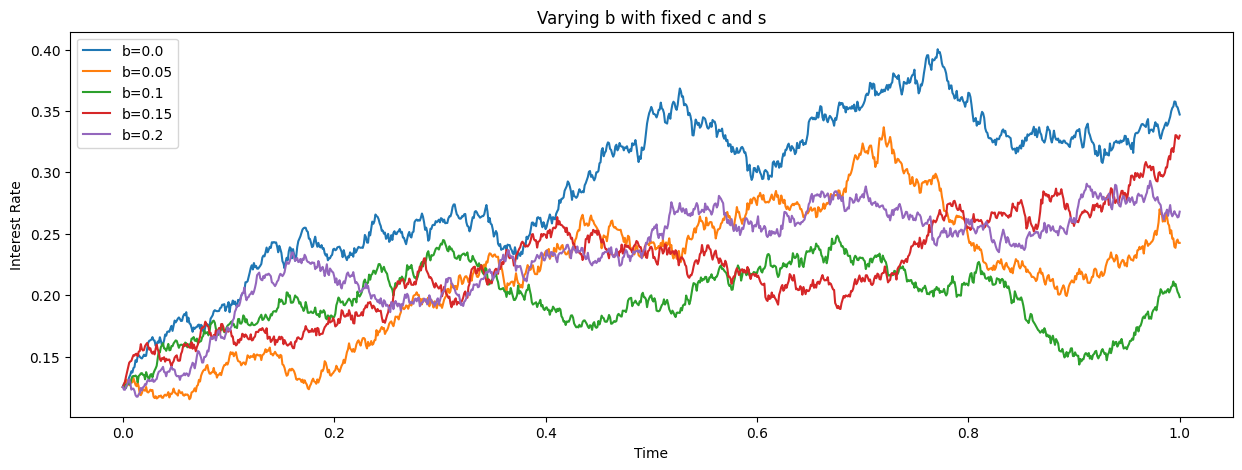

MSE for b=0.1, c=0.004, s=0.01: 0.016954905837786596
MSE for b=0.1, c=0.004, s=0.02: 0.008268952925987087
MSE for b=0.1, c=0.004, s=0.03: 0.01878745644512039
MSE for b=0.1, c=0.004, s=0.04: 0.016010820100831318


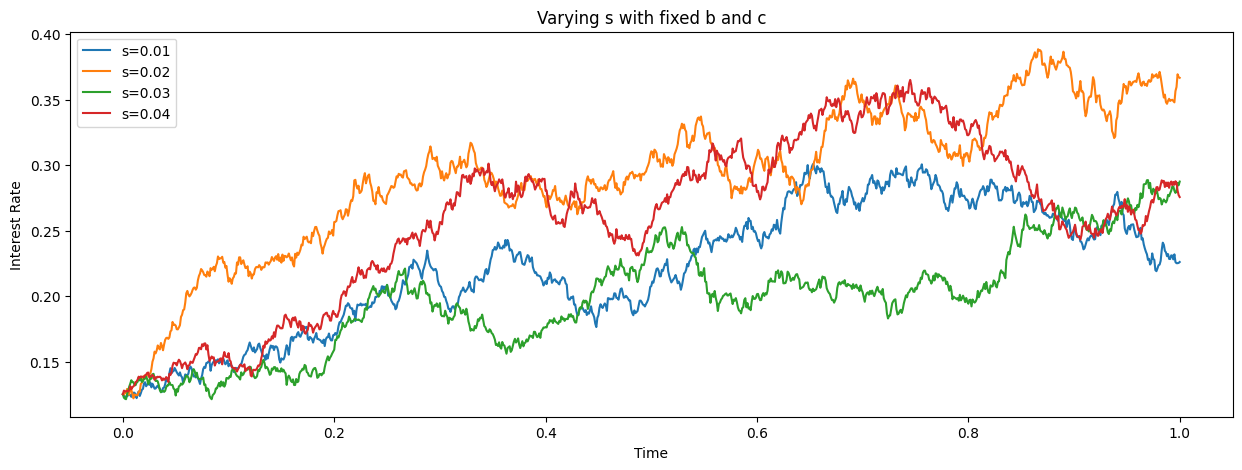

MSE for b=0.1, c=0.002, s=0.02: 0.013720785817133112
MSE for b=0.1, c=0.004, s=0.02: 0.012885047236788303
MSE for b=0.1, c=0.006, s=0.02: 0.019252904049893545
MSE for b=0.1, c=0.008, s=0.02: 0.019274143030587294


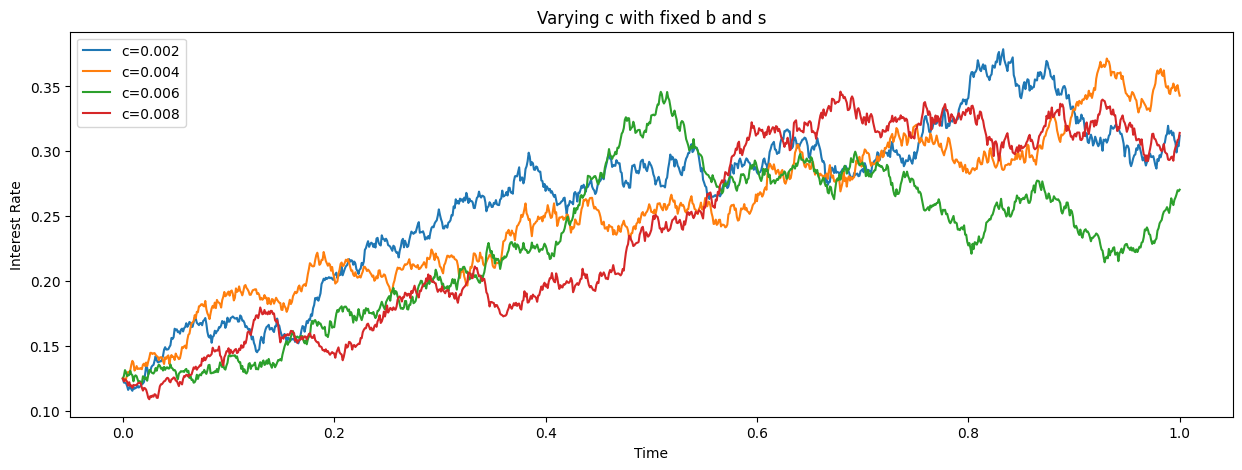

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd  # Assuming you have the rr DataFrame with the Interest Rate data

# Parameters
alpha = 2.4
beta = 0.29
sigma = 0.21

# Simulation parameters
T = 1.0  # Total time
dt = 0.001  # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions
np.random.seed(42)  # For reproducibility
x0 = np.array(rr['Interest Rate'] / 100)[0]  # Initial interest rate

# Values of b, c, and s to test (reduced)
b_values = [0.0, 0.05, 0.1, 0.15, 0.2]
c_values = [0.002, 0.004, 0.006, 0.008]
s_values = [0.01, 0.02, 0.03, 0.04]

# Assuming observed data is available
observed_data = np.array(rr['Interest Rate'] / 100)

# Make sure to match the lengths
observed_length = len(observed_data)
simulated_length = min(N + 1, observed_length)

# Function to simulate y(t) using Euler-Maruyama method
def simulate_y(c, s):
    y = np.zeros(N + 1)
    y[0] = np.random.normal(0, np.sqrt(s**2 / (2 * c)))
    for n in range(N):
        eta_n = np.random.normal(0, 1)
        y[n + 1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n
    return y

# Function to simulate x(t) using Euler-Maruyama method
def simulate_x(b, y):
    x = np.zeros(N + 1)
    x[0] = x0
    for n in range(N):
        xi_n = np.random.normal(0, 1)
        x[n + 1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n
    return x

# Scenario 1: Varying b while keeping c and s fixed
plt.figure(figsize=(15, 5))
fixed_c = 0.004
fixed_s = 0.02
for b in b_values:
    y = simulate_y(fixed_c, fixed_s)
    x = simulate_x(b, y)
    mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
    print(f'MSE for b={b}, c={fixed_c}, s={fixed_s}: {mse}')
    plt.plot(np.linspace(0, T, N + 1), x, label=f'b={b}')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Varying b with fixed c and s')
plt.legend()
plt.savefig('varying_b.png')
plt.show()

# Scenario 2: Varying s while keeping b and c fixed
plt.figure(figsize=(15, 5))
fixed_b = 0.1
fixed_c = 0.004
for s in s_values:
    y = simulate_y(fixed_c, s)
    x = simulate_x(fixed_b, y)
    mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
    print(f'MSE for b={fixed_b}, c={fixed_c}, s={s}: {mse}')
    plt.plot(np.linspace(0, T, N + 1), x, label=f's={s}')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Varying s with fixed b and c')
plt.legend()
plt.savefig('varying_s.png')
plt.show()

# Scenario 3: Varying c while keeping b and s fixed
plt.figure(figsize=(15, 5))
fixed_b = 0.1
fixed_s = 0.02
for c in c_values:
    y = simulate_y(c, fixed_s)
    x = simulate_x(fixed_b, y)
    mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
    print(f'MSE for b={fixed_b}, c={c}, s={fixed_s}: {mse}')
    plt.plot(np.linspace(0, T, N + 1), x, label=f'c={c}')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.title('Varying c with fixed b and s')
plt.legend()
plt.savefig('varying_c.png')
plt.show()


MSE for b=0.0, c=0.004, s=0.02: 0.009634220304803681
MSE for b=0.05, c=0.004, s=0.02: 0.019869725261814533
MSE for b=0.1, c=0.004, s=0.02: 0.012662200639704966
MSE for b=0.15, c=0.004, s=0.02: 0.01342785451012317
MSE for b=0.2, c=0.004, s=0.02: 0.014875039866883589


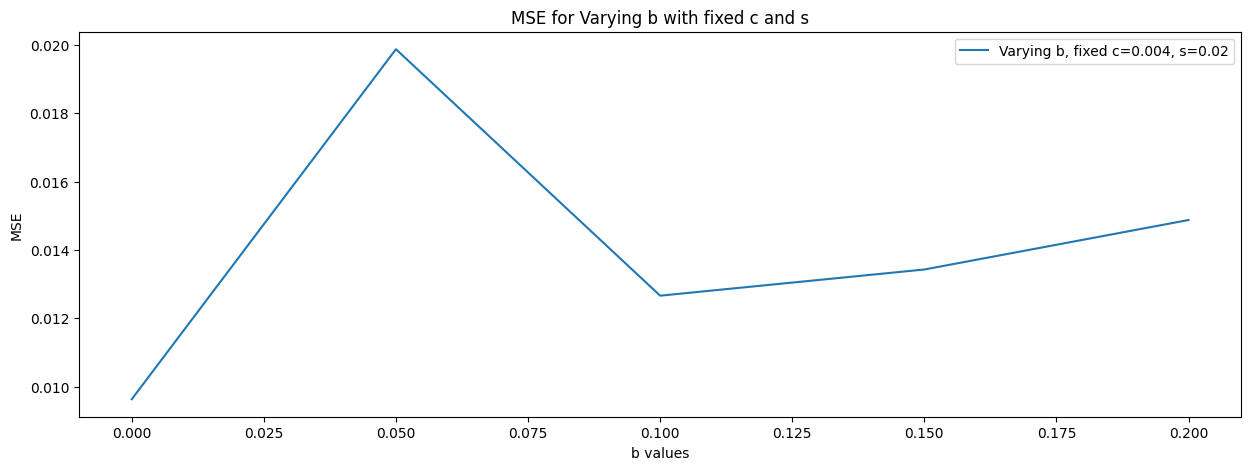

MSE for b=0.1, c=0.004, s=0.01: 0.016954905837786596
MSE for b=0.1, c=0.004, s=0.02: 0.008268952925987087
MSE for b=0.1, c=0.004, s=0.03: 0.01878745644512039
MSE for b=0.1, c=0.004, s=0.04: 0.016010820100831318


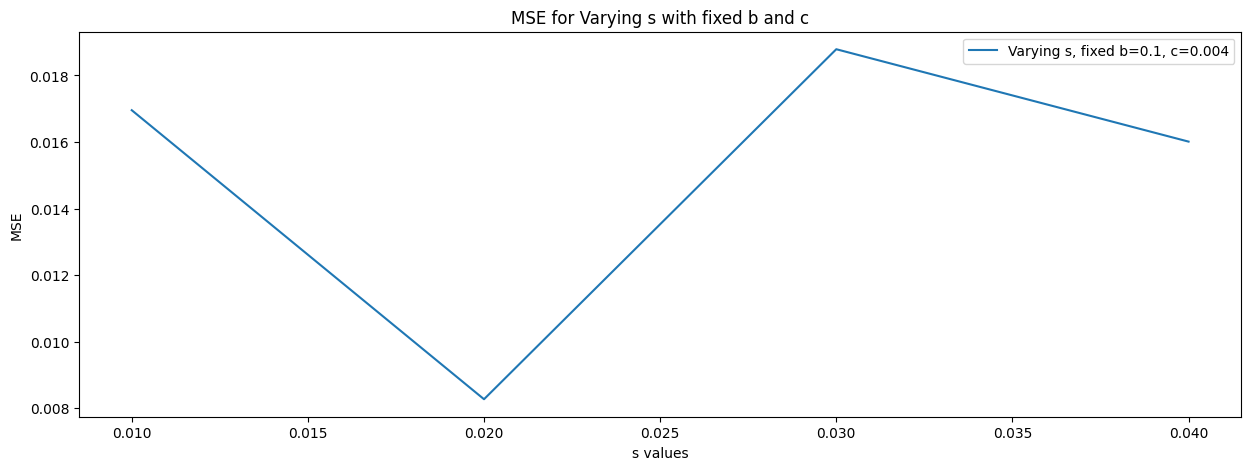

MSE for b=0.1, c=0.002, s=0.02: 0.013720785817133112
MSE for b=0.1, c=0.004, s=0.02: 0.012885047236788303
MSE for b=0.1, c=0.006, s=0.02: 0.019252904049893545
MSE for b=0.1, c=0.008, s=0.02: 0.019274143030587294


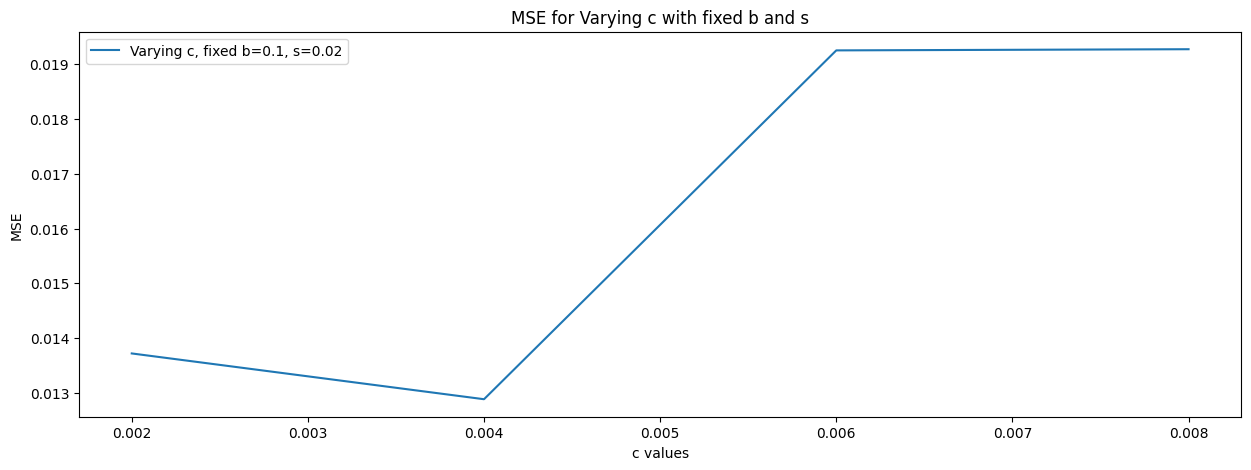

Variance of MSE for varying b: 1.1270491908207581e-05
Variance of MSE for varying s: 1.612377816353359e-05
Variance of MSE for varying c: 8.969572750312032e-06


In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd  # Assuming you have the rr DataFrame with the Interest Rate data

# Parameters
alpha = 2.4
beta = 0.29
sigma = 0.21

# Simulation parameters
T = 1.0  # Total time
dt = 0.001  # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions
np.random.seed(42)  # For reproducibility
x0 = np.array(rr['Interest Rate'] / 100)[0]  # Initial interest rate

# Values of b, c, and s to test
b_values = [0.0, 0.05, 0.1, 0.15, 0.2]
c_values = [0.002, 0.004, 0.006, 0.008]
s_values = [0.01, 0.02, 0.03, 0.04]

# Assuming observed data is available
observed_data = np.array(rr['Interest Rate'] / 100)

# Make sure to match the lengths
observed_length = len(observed_data)
simulated_length = min(N + 1, observed_length)

# Function to simulate y(t) using Euler-Maruyama method
def simulate_y(c, s):
    y = np.zeros(N + 1)
    y[0] = np.random.normal(0, np.sqrt(s**2 / (2 * c)))
    for n in range(N):
        eta_n = np.random.normal(0, 1)
        y[n + 1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n
    return y

# Function to simulate x(t) using Euler-Maruyama method
def simulate_x(b, y):
    x = np.zeros(N + 1)
    x[0] = x0
    for n in range(N):
        xi_n = np.random.normal(0, 1)
        x[n + 1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n
    return x

# Function to calculate MSE for given parameter sets
def calculate_mse(b_values, c_values, s_values, fixed_b=None, fixed_c=None, fixed_s=None):
    mse_results = []
    for b in (b_values if fixed_b is None else [fixed_b]):
        for c in (c_values if fixed_c is None else [fixed_c]):
            for s in (s_values if fixed_s is None else [fixed_s]):
                y = simulate_y(c, s)
                x = simulate_x(b, y)
                mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
                mse_results.append(mse)
                print(f'MSE for b={b}, c={c}, s={s}: {mse}')
    return mse_results

# Scenario 1: Varying b while keeping c and s fixed
fixed_c = 0.004
fixed_s = 0.02
mse_b = calculate_mse(b_values, [fixed_c], [fixed_s])
plt.figure(figsize=(15, 5))
plt.plot(b_values, mse_b, label=f'Varying b, fixed c={fixed_c}, s={fixed_s}')
plt.xlabel('b values')
plt.ylabel('MSE')
plt.title('MSE for Varying b with fixed c and s')
plt.legend()
plt.show()

# Scenario 2: Varying s while keeping b and c fixed
fixed_b = 0.1
fixed_c = 0.004
mse_s = calculate_mse([fixed_b], [fixed_c], s_values)
plt.figure(figsize=(15, 5))
plt.plot(s_values, mse_s, label=f'Varying s, fixed b={fixed_b}, c={fixed_c}')
plt.xlabel('s values')
plt.ylabel('MSE')
plt.title('MSE for Varying s with fixed b and c')
plt.legend()
plt.show()

# Scenario 3: Varying c while keeping b and s fixed
fixed_b = 0.1
fixed_s = 0.02
mse_c = calculate_mse([fixed_b], c_values, [fixed_s])
plt.figure(figsize=(15, 5))
plt.plot(c_values, mse_c, label=f'Varying c, fixed b={fixed_b}, s={fixed_s}')
plt.xlabel('c values')
plt.ylabel('MSE')
plt.title('MSE for Varying c with fixed b and s')
plt.legend()
plt.show()

# Analyze variability of MSE values
print(f'Variance of MSE for varying b: {np.var(mse_b)}')
print(f'Variance of MSE for varying s: {np.var(mse_s)}')
print(f'Variance of MSE for varying c: {np.var(mse_c)}')


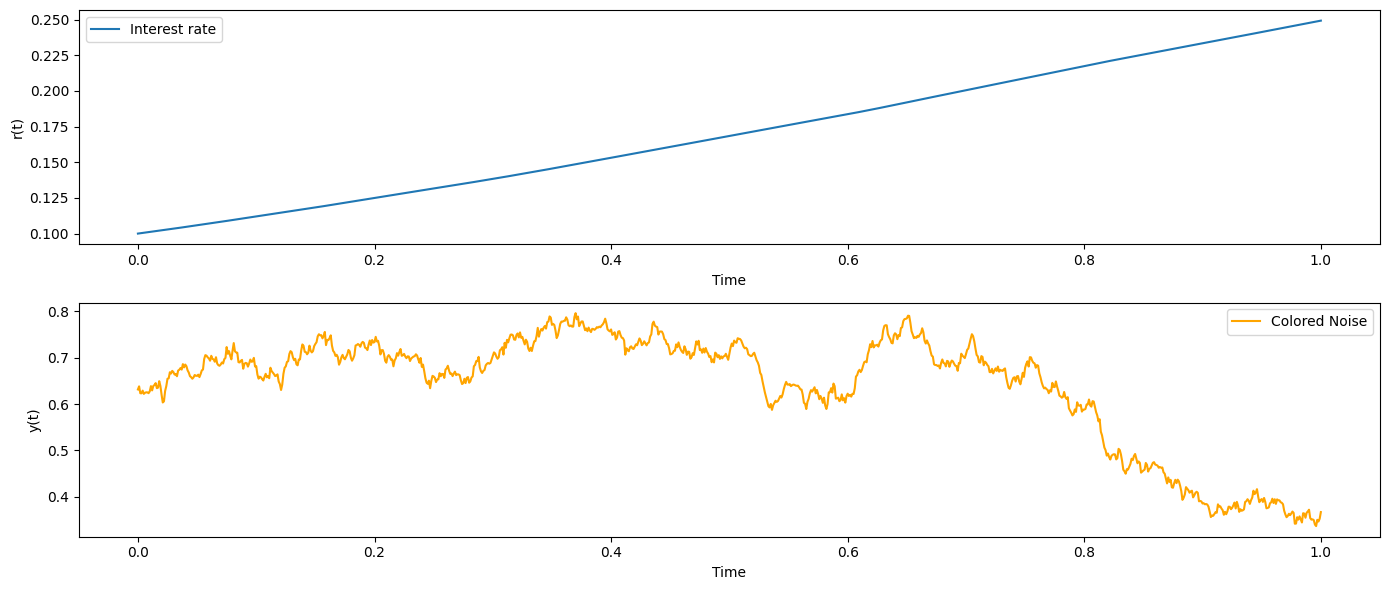

In [64]:
import numpy as np
import matplotlib.pyplot as plt
np.random. seed(10)
# Parameters (Look for the right estimation pro)
a = 0.5  # Example value for a
b = 0.1  # Example value for b
c = 0.2  # Example value for c
s = 0.3  # Example value for s
T = 1.0  # Total time
N = 1000  # Number of time steps
Delta_t = T / N

# Initial conditions
r = np.zeros(N+1)
y = np.zeros(N+1)
r[0] = 0.1  # Initial value for x
y[0] = np.random.normal(0, np.sqrt(s**2 / (2 * c)))

# Time-stepping
for n in range(N):
    ri_n = np.random.normal(0, 1)
    r[n+1] = r[n] + a * r[n] * Delta_t + b * y[n] * Delta_t
    y[n+1] = y[n] - c * y[n] * Delta_t + s * np.sqrt(Delta_t) * ri_n

# Time vector for plotting
t = np.linspace(0, T, N+1)

# Plot the results
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(t, r, label='Interest rate')
plt.xlabel('Time')
plt.ylabel('r(t)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, y, label='Colored Noise', color='orange')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.legend()

plt.tight_layout()
plt.savefig('nii')

In [65]:
rr

,Issue Date,Tender,Security Type,Discount Rate,Interest Rate,year,log Interest rate,square
207,03 Jan 2022,1779,91 DAY BILL,12.1453,12.5256,2022,2.527775,3.539152
208,10 Jan 2022,1780,91 DAY BILL,12.1446,12.5249,2022,2.527719,3.539054
209,17 Jan 2022,1781,91 DAY BILL,12.1412,12.5213,2022,2.527431,3.538545
210,24 Jan 2022,1782,91 DAY BILL,12.1646,12.5461,2022,2.529410,3.542047
211,31 Jan 2022,1783,91 DAY BILL,12.2467,12.6335,2022,2.536352,3.554364
...,...,...,...,...,...,...,...,...
325,08 Apr 2024,1897,91 DAY BILL,24.1768,25.7321,2024,3.247739,5.072682
326,15 Apr 2024,1898,91 DAY BILL,24.1830,25.7391,2024,3.248011,5.073372
327,22 Apr 2024,1899,91 DAY BILL,24.1032,25.6487,2024,3.244493,5.064455
328,29 Apr 2024,1900,91 DAY BILL,24.0140,25.5478,2024,3.240551,5.054483


Mean Squared Error for White Noise Model: 0.019926717970321854


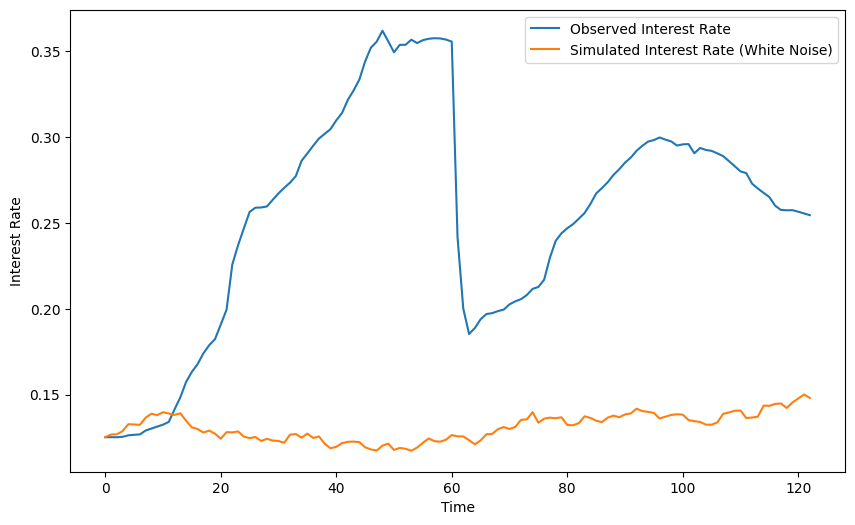

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Parameters
alpha = 2.4
beta = 0.29
sigma = 0.21

# Simulation parameters
T = 1.0  # Total time
dt = 0.001  # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions
np.random.seed(42)
x0 = np.array(rr['Interest Rate'] / 100)[0]  # Initial interest rate

# Simulate white noise model
x_white_noise = np.zeros(N + 1)
x_white_noise[0] = x0

for n in range(N):
    xi_n = np.random.normal(0, 1)
    x_white_noise[n + 1] = x_white_noise[n] + alpha * (beta - x_white_noise[n]) * dt + sigma * np.sqrt(x_white_noise[n]) * np.sqrt(dt) * xi_n

# Calculate MSE for white noise model
observed_data1 = np.array(rr['Interest Rate'] / 100)
simulated_length = min(N + 1, len(observed_data1))
mse_white_noise = mean_squared_error(observed_data[:simulated_length], x_white_noise[:simulated_length])
print(f'Mean Squared Error for White Noise Model: {mse_white_noise}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(observed_data1, label='Observed Interest Rate')
plt.plot(x_white_noise[:len(observed_data1)], label='Simulated Interest Rate (White Noise)')
plt.legend()
# plt.title('White Noise Model')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.savefig('tt')
# plt.show()


In [70]:
np.array(rr['Interest Rate']/100)

array([0.125256, 0.125249, 0.125213, 0.125461, 0.126335, 0.126646,
       0.126852, 0.129145, 0.130269, 0.131418, 0.132539, 0.134152,
       0.141435, 0.148456, 0.157407, 0.163287, 0.167814, 0.174085,
       0.1788  , 0.182262, 0.190807, 0.199389, 0.225743, 0.236991,
       0.246805, 0.256383, 0.258821, 0.258936, 0.25955 , 0.263403,
       0.267149, 0.270411, 0.273416, 0.277213, 0.286142, 0.290452,
       0.294837, 0.299067, 0.3018  , 0.30453 , 0.309634, 0.313943,
       0.321554, 0.327045, 0.333407, 0.343945, 0.351966, 0.355427,
       0.361825, 0.355688, 0.349277, 0.353609, 0.353634, 0.356595,
       0.354643, 0.356342, 0.357144, 0.357454, 0.357339, 0.356672,
       0.355493, 0.241609, 0.199998, 0.185289, 0.188784, 0.193881,
       0.196934, 0.197444, 0.198635, 0.199474, 0.202581, 0.204309,
       0.205623, 0.207996, 0.211578, 0.212694, 0.216927, 0.229715,
       0.23954 , 0.243924, 0.246865, 0.249211, 0.252417, 0.255723,
       0.260918, 0.267073, 0.270231, 0.273614, 0.277868, 0.281

Mean Squared Error for Colored Noise Model: 0.015289142344544619


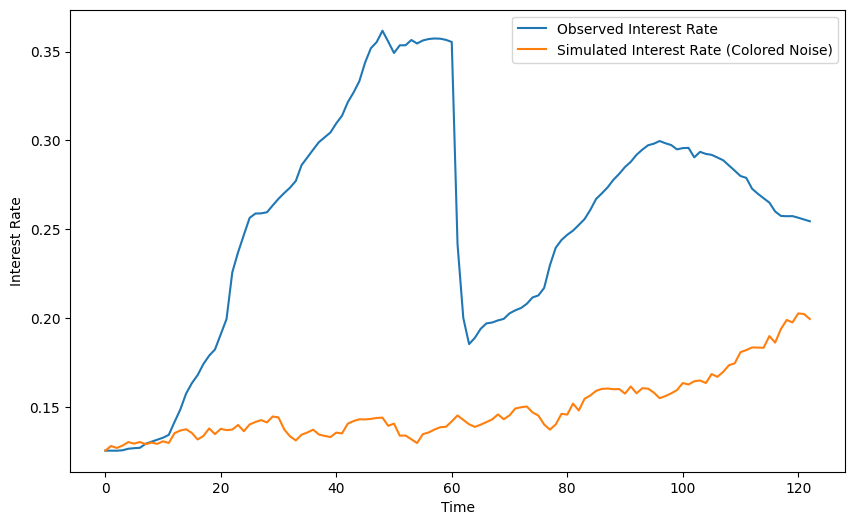

In [72]:
# Parameters for colored noise
c = 0.002
s = 0.02
b = 0.1

# Initial conditions for colored noise
# np.random.seed(42)
y0 = np.random.normal(0, np.sqrt(s**2 / (2 * c)))  # Initial colored noise

# Simulate colored noise model
x_colored_noise = np.zeros(N + 1)
y_colored_noise = np.zeros(N + 1)
x_colored_noise[0] = x0
y_colored_noise[0] = y0

for n in range(N):
    xi_n = np.random.normal(0, 1)
    eta_n = np.random.normal(0, 1)
    x_colored_noise[n + 1] = x_colored_noise[n] + alpha * (beta - x_colored_noise[n]) * dt + b * y_colored_noise[n] * dt + sigma * np.sqrt(x_colored_noise[n]) * np.sqrt(dt) * xi_n
    y_colored_noise[n + 1] = y_colored_noise[n] - c * y_colored_noise[n] * dt + s * np.sqrt(dt) * eta_n

# Calculate MSE for colored noise model
mse_colored_noise = mean_squared_error(observed_data1[:simulated_length], x_colored_noise[:simulated_length])
print(f'Mean Squared Error for Colored Noise Model: {mse_colored_noise}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(observed_data1, label='Observed Interest Rate')
plt.plot(x_colored_noise[:len(observed_data1)], label='Simulated Interest Rate (Colored Noise)')
plt.legend(loc = 'upper right')
# plt.title('Colored Noise Model')
plt.xlabel('Time')
plt.ylabel('Interest Rate')
plt.savefig('t')
# plt.show()


In [73]:
data =np.array(rr['Interest Rate']/100)

In [74]:
n_train = int(len(data)*0.8)

In [75]:
train_set = data[:n_train]
test_set = data[n_train:]

In [76]:
test_set

array([0.297427, 0.29498 , 0.295684, 0.295836, 0.290494, 0.293585,
       0.292419, 0.291902, 0.290399, 0.288845, 0.285913, 0.282982,
       0.279965, 0.278933, 0.272829, 0.269987, 0.267459, 0.264987,
       0.259988, 0.257493, 0.257321, 0.257391, 0.256487, 0.255478,
       0.254482])

In [77]:

# function to estimate parameters
def ols_cir(data, dt):

    # define variables
    Nsteps = len(train_set)
    rs = train_set[:Nsteps - 1]  
    rt =train_set[1:Nsteps]
    
    # model initialization
    model = LinearRegression()

    # feature engineering to fit the theoretical model
    y = (rt - rs) / np.sqrt(rs)
#     print(y)
    z1 = dt / np.sqrt(rs)
    z2 = dt * np.sqrt(rs)
    X = np.column_stack((z1, z2))

    # fit the model
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)

    # calculate the predicted values (y_hat), residuals and the parameters
    y_hat = model.predict(X)
    residuals = y - y_hat
    beta1 = model.coef_[0]        
    beta2 = model.coef_[1]

    # get the parameter of interest for CIR
    k0 = -beta2
    theta0 = beta1/k0
    sigma0 = np.std(residuals)/np.sqrt(dt)
    
    return k0, theta0, sigma0,y_hat

In [78]:
# assinging variables that will be printed from our ols_cir function
e,f,g,h = ols_cir(np.array(rr['Interest Rate']/100),1/100)
print(f' k0:{e}, theta0:{f}, sigma0:{g}')

 k0:1.9595387700240998, theta0:0.3391809122602274, sigma0:0.2364674459892495


In [79]:
np.cumsum(h)+train_set[0]

array([0.13710048, 0.14894568, 0.16079457, 0.17261803, 0.18435233,
       0.19605509, 0.20773702, 0.21918974, 0.23053192, 0.2417623 ,
       0.25288474, 0.26385383, 0.27415729, 0.28385708, 0.29283495,
       0.30136455, 0.30956178, 0.31731548, 0.32474778, 0.33195024,
       0.33860626, 0.34474084, 0.34941932, 0.35353268, 0.35717632,
       0.36038058, 0.36347582, 0.36656594, 0.36962878, 0.37252203,
       0.37525291, 0.37784434, 0.38030889, 0.38261518, 0.38455811,
       0.38632986, 0.38793015, 0.3893675 , 0.39070085, 0.39193127,
       0.39297177, 0.39385441, 0.39446353, 0.39487936, 0.39507531,
       0.39491613, 0.39449384, 0.39395986, 0.3932222 , 0.39267983,
       0.39234508, 0.39186964, 0.39139338, 0.39082195, 0.39031317,
       0.38974984, 0.38916084, 0.38856194, 0.38796671, 0.38739281,
       0.38685671, 0.39074646, 0.39684502, 0.40385061, 0.41063343,
       0.41709967, 0.42338077, 0.42963128, 0.43581065, 0.4419402 ,
       0.44788729, 0.45373427, 0.45950576, 0.46514227, 0.47057

# FUNCTION FOR COMPUTING THE PREDICTED RATES

In [80]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Define the ols_cir function
def ols_cir(train_set, dt):
    Nsteps = len(train_set)
    rs = train_set[:Nsteps - 1]  
    rt = train_set[1:Nsteps]
    
    model = LinearRegression()

    y = (rt - rs) / np.sqrt(rs)
    z1 = dt / np.sqrt(rs)
    z2 = dt * np.sqrt(rs)
    X = np.column_stack((z1, z2))

    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)

    y_hat = model.predict(X)
    residuals = y - y_hat
    beta1 = model.coef_[0]        
    beta2 = model.coef_[1]

    k0 = -beta2
    theta0 = beta1 / k0
    sigma0 = np.std(residuals) / np.sqrt(dt)
    
    return k0, theta0, sigma0, y_hat

# Estimate parameters using training set
dt = 1  # Assuming daily data, change as necessary
k0, theta0, sigma0, y_hat_train = ols_cir(train_set, dt)

# Function to predict using CIR model parameters
def predict_cir(test_set, k0, theta0, sigma0, dt):
    Nsteps = len(test_set)
    predictions = np.zeros(Nsteps)
    predictions[0] = test_set[0]  # Initial value

    for t in range(1, Nsteps):
        rs = predictions[t-1]
        drift = k0 * (theta0 - rs) * dt
        diffusion = sigma0 * np.sqrt(rs) * np.sqrt(dt) * np.random.normal()
        predictions[t] = rs + drift + diffusion

    return predictions

# Perform predictions on the test set
predicted_test_set = predict_cir(test_set, k0, theta0, sigma0, dt)

# Print results
print("Test Set:")
print(test_set)
print("\nPredicted Test Set:")
print(predicted_test_set)


Test Set:
[0.297427 0.29498  0.295684 0.295836 0.290494 0.293585 0.292419 0.291902
 0.290399 0.288845 0.285913 0.282982 0.279965 0.278933 0.272829 0.269987
 0.267459 0.264987 0.259988 0.257493 0.257321 0.257391 0.256487 0.255478
 0.254482]

Predicted Test Set:
[0.297427   0.28714949 0.2829281  0.30777361 0.31569024 0.29840702
 0.30548434 0.28592183 0.30065534 0.29530166 0.29495827 0.31285145
 0.29634289 0.27919768 0.27308115 0.28720777 0.26897198 0.23561477
 0.23246571 0.24084735 0.25670318 0.25277031 0.24957223 0.26495946
 0.24365541]


# Updated code for sensitivity analysis

MSE for b=0.0, c=0.004, s=0.02: 0.004610097943315171
MSE for b=0.05, c=0.004, s=0.02: 0.0034112972590230944
MSE for b=0.1, c=0.004, s=0.02: 0.0027702085433996496
MSE for b=0.15, c=0.004, s=0.02: 0.003200278820805133
MSE for b=0.2, c=0.004, s=0.02: 0.005134216537048896
MSE for b=0.1, c=0.004, s=0.01: 0.0029515741829771016
MSE for b=0.1, c=0.004, s=0.02: 0.005655098023317147
MSE for b=0.1, c=0.004, s=0.03: 0.0028353130490458896
MSE for b=0.1, c=0.004, s=0.04: 0.0019876343061271673
MSE for b=0.1, c=0.002, s=0.02: 0.002212610155821394
MSE for b=0.1, c=0.004, s=0.02: 0.0038729872718309445
MSE for b=0.1, c=0.006, s=0.02: 0.00338938826493496
MSE for b=0.1, c=0.008, s=0.02: 0.003653591067854711
Variance of MSE for varying b: 8.008876012835586e-07
Variance of MSE for varying s: 1.8982359101224114e-06
Variance of MSE for varying c: 4.1061816807263e-07


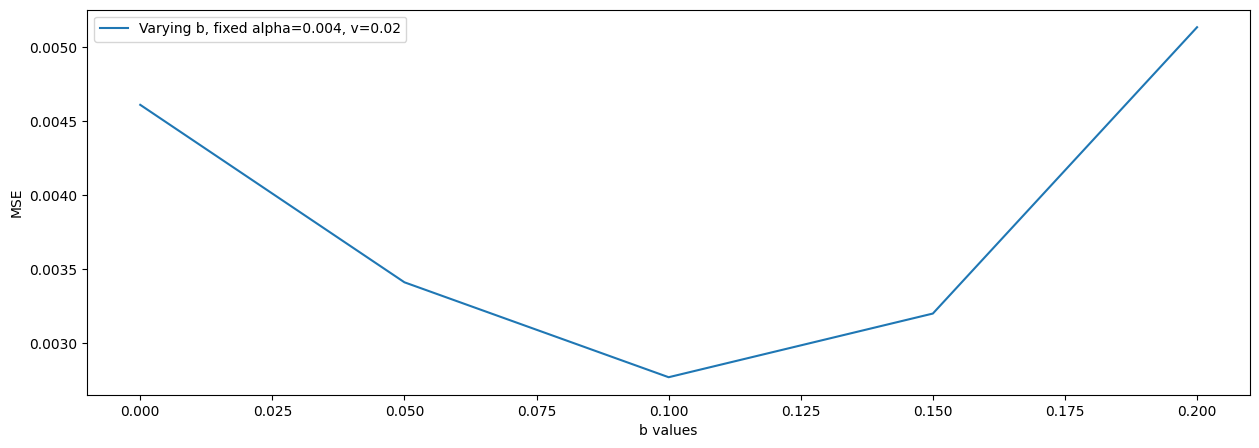

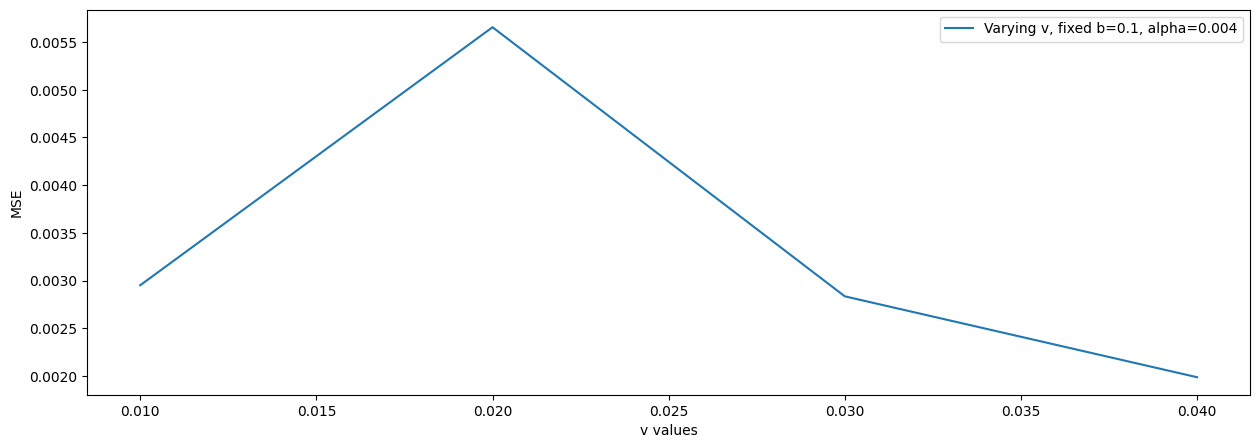

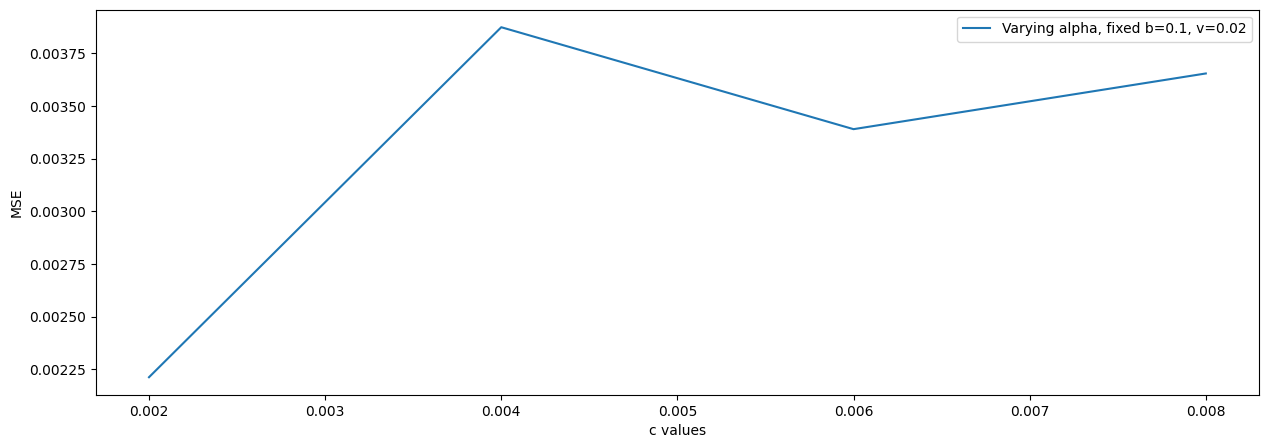

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Parameters
alpha = 2.4
beta = 0.29
sigma = 0.21

# Simulation parameters
T = 1.0  # Total time
dt = 0.001  # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions (Example initialization, assuming rr DataFrame exists)
np.random.seed(42)  # For reproducibility
# rr = pd.DataFrame({'Interest Rate': np.random.uniform(0.025, 0.036, size=1000)})  # Example data
x0 = np.array(rr['Interest Rate'] / 100)[0]  # Initial interest rate

# Observed data
observed_data = np.array(rr['Interest Rate'] / 100)

# Make sure to match the lengths
observed_length = len(observed_data)
simulated_length = min(N + 1, observed_length)

# Values of b, c, and s to test
b_values = [0.0, 0.05, 0.1, 0.15, 0.2]
c_values = [0.002, 0.004, 0.006, 0.008]
s_values = [0.01, 0.02, 0.03, 0.04]

# Function to simulate y(t) using Euler-Maruyama method
def simulate_y(c, s):
    y = np.zeros(N + 1)
    y[0] = np.random.normal(0, np.sqrt(s**2 / (2 * c)))
    for n in range(N):
        eta_n = np.random.normal(0, 1)
        y[n + 1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n
    return y

# Function to simulate x(t) using Euler-Maruyama method
def simulate_x(b, y):
    x = np.zeros(N + 1)
    x[0] = x0
    for n in range(N):
        xi_n = np.random.normal(0, 1)
        x[n + 1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n
    return x

# Function to calculate MSE for given parameter sets
def calculate_mse(b_values, c_values, s_values, fixed_b=None, fixed_c=None, fixed_s=None):
    mse_results = []
    for b in (b_values if fixed_b is None else [fixed_b]):
        for c in (c_values if fixed_c is None else [fixed_c]):
            for s in (s_values if fixed_s is None else [fixed_s]):
                y = simulate_y(c, s)
                x = simulate_x(b, y)
                mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
                mse_results.append(mse)
                print(f'MSE for b={b}, c={c}, s={s}: {mse}')
    return mse_results

# Scenario 1: Varying b while keeping c and s fixed
fixed_c = 0.004
fixed_s = 0.02
mse_b = calculate_mse(b_values, [fixed_c], [fixed_s])
plt.figure(figsize=(15, 5))
plt.plot(b_values, mse_b, label=f'Varying b, fixed alpha={fixed_c}, v={fixed_s}')
plt.xlabel('b values')
plt.ylabel('MSE')
# plt.title('MSE for Varying b with fixed c and s')
plt.legend()
plt.savefig('a')

# Scenario 2: Varying s while keeping b and c fixed
fixed_b = 0.1
fixed_c = 0.004
mse_s = calculate_mse([fixed_b], [fixed_c], s_values)
plt.figure(figsize=(15, 5))
plt.plot(s_values, mse_s, label=f'Varying v, fixed b={fixed_b}, alpha={fixed_c}')
plt.xlabel('v values')
plt.ylabel('MSE')
# plt.title('MSE for Varying v with fixed b and c(alph)')
plt.legend()
plt.savefig('c')

# Scenario 3: Varying c while keeping b and s fixed
fixed_b = 0.1
fixed_s = 0.02
mse_c = calculate_mse([fixed_b], c_values, [fixed_s])
plt.figure(figsize=(15, 5))
plt.plot(c_values, mse_c, label=f'Varying alpha, fixed b={fixed_b}, v={fixed_s}')
plt.xlabel('c values')
plt.ylabel('MSE')
# plt.title('MSE for Varying c with fixed b and s')
plt.legend()
plt.savefig('b')

# Analyze variability of MSE values
print(f'Variance of MSE for varying b: {np.var(mse_b)}')
print(f'Variance of MSE for varying s: {np.var(mse_s)}')
print(f'Variance of MSE for varying c: {np.var(mse_c)}')


MSE for b=0.0, c=0.004, s=0.02: 0.004610097943315171
MSE for b=0.05, c=0.004, s=0.02: 0.0034112972590230944
MSE for b=0.07500000000000001, c=0.004, s=0.02: 0.0027696335540672097
MSE for b=0.1, c=0.004, s=0.02: 0.0031698675829342224
MSE for b=0.125, c=0.004, s=0.02: 0.005158978102367673
MSE for b=0.15, c=0.004, s=0.02: 0.003060102616692505
MSE for b=0.15000000000000002, c=0.004, s=0.02: 0.005767455717010348
MSE for b=0.2, c=0.004, s=0.02: 0.0029744023488972116


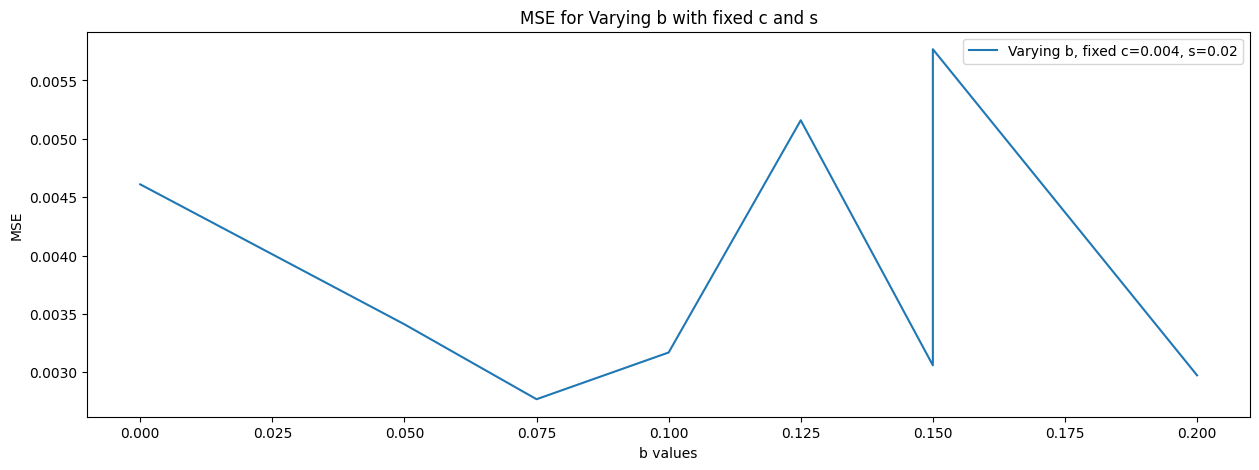

MSE for b=0.1, c=0.004, s=0.01: 0.001999072112524073
MSE for b=0.1, c=0.004, s=0.02: 0.0022157293944442347
MSE for b=0.1, c=0.004, s=0.03: 0.003865677646018876
MSE for b=0.1, c=0.004, s=0.04: 0.003062234531146048


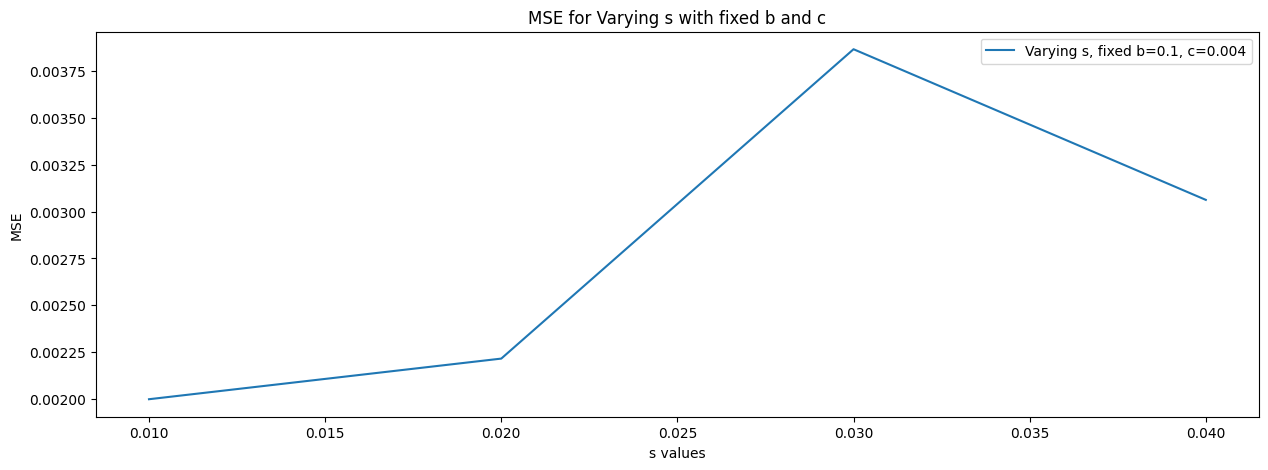

MSE for b=0.1, c=0.002, s=0.02: 0.0036159077260045852
MSE for b=0.1, c=0.004, s=0.02: 0.006068953018566381
MSE for b=0.1, c=0.006, s=0.02: 0.002305767265307307
MSE for b=0.1, c=0.008, s=0.02: 0.003422453060136465


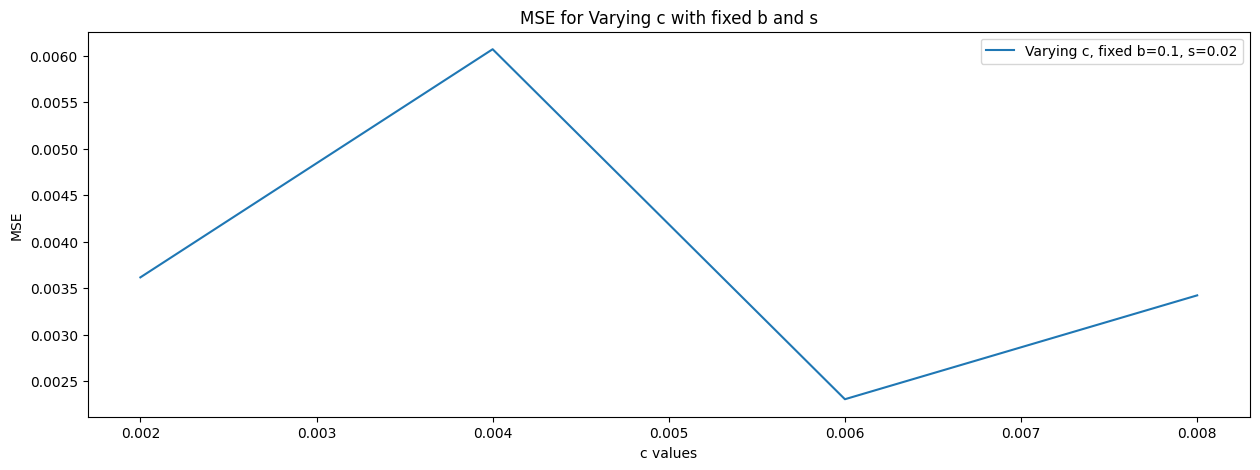

Variance of MSE for varying b: 1.147349310983863e-06
Variance of MSE for varying s: 5.466182463766189e-07
Variance of MSE for varying c: 1.8864900093585407e-06


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

# Parameters
alpha = 2.4
beta = 0.29
sigma = 0.21

# Simulation parameters
T = 1.0  # Total time
dt = 0.001  # Time step
N = int(T / dt)  # Number of time steps

# Initial conditions (Example initialization, assuming rr DataFrame exists)
np.random.seed(42)  # For reproducibility
# rr = pd.DataFrame({'Interest Rate': np.random.uniform(0.025, 0.036, size=1000)})  # Example data
x0 = np.array(rr['Interest Rate'] / 100)[0]  # Initial interest rate

# Observed data
observed_data = np.array(rr['Interest Rate'] / 100)

# Make sure to match the lengths
observed_length = len(observed_data)
simulated_length = min(N + 1, observed_length)

# Values of b, c, and s to test
b_values = [0.0, 0.05, 0.1, 0.15, 0.2]
c_values = [0.002, 0.004, 0.006, 0.008]
s_values = [0.01, 0.02, 0.03, 0.04]

# Function to simulate y(t) using Euler-Maruyama method
def simulate_y(c, s):
    y = np.zeros(N + 1)
    y[0] = np.random.normal(0, np.sqrt(s**2 / (2 * c)))
    for n in range(N):
        eta_n = np.random.normal(0, 1)
        y[n + 1] = y[n] - c * y[n] * dt + s * np.sqrt(dt) * eta_n
    return y

# Function to simulate x(t) using Euler-Maruyama method
def simulate_x(b, y):
    x = np.zeros(N + 1)
    x[0] = x0
    for n in range(N):
        xi_n = np.random.normal(0, 1)
        x[n + 1] = x[n] + alpha * (beta - x[n]) * dt + b * y[n] * dt + sigma * np.sqrt(x[n]) * np.sqrt(dt) * xi_n
    return x

# Function to calculate MSE for given parameter sets
def calculate_mse(b_values, c_values, s_values, fixed_b=None, fixed_c=None, fixed_s=None):
    mse_results = []
    for b in (b_values if fixed_b is None else [fixed_b]):
        for c in (c_values if fixed_c is None else [fixed_c]):
            for s in (s_values if fixed_s is None else [fixed_s]):
                y = simulate_y(c, s)
                x = simulate_x(b, y)
                mse = mean_squared_error(observed_data[:simulated_length], x[:simulated_length])
                mse_results.append(mse)
                print(f'MSE for b={b}, c={c}, s={s}: {mse}')
    return mse_results

# Scenario 1: Varying b while keeping c and s fixed
fixed_c = 0.004
fixed_s = 0.02

# Define variations for b
base_b = 0.1
b_variations = [base_b - 0.5 * base_b, base_b - 0.25 * base_b, base_b, base_b + 0.25 * base_b, base_b + 0.5 * base_b]

# Combine base and variations
b_values_expanded = sorted(set(b_values + b_variations))

mse_b = calculate_mse(b_values_expanded, [fixed_c], [fixed_s])
plt.figure(figsize=(15, 5))
plt.plot(b_values_expanded, mse_b, label=f'Varying b, fixed c={fixed_c}, s={fixed_s}')
plt.xlabel('b values')
plt.ylabel('MSE')
plt.title('MSE for Varying b with fixed c and s')
plt.legend()
plt.show()

# Scenario 2: Varying s while keeping b and c fixed
fixed_b = 0.1
fixed_c = 0.004
mse_s = calculate_mse([fixed_b], [fixed_c], s_values)
plt.figure(figsize=(15, 5))
plt.plot(s_values, mse_s, label=f'Varying s, fixed b={fixed_b}, c={fixed_c}')
plt.xlabel('s values')
plt.ylabel('MSE')
plt.title('MSE for Varying s with fixed b and c')
plt.legend()
plt.show()

# Scenario 3: Varying c while keeping b and s fixed
fixed_b = 0.1
fixed_s = 0.02
mse_c = calculate_mse([fixed_b], c_values, [fixed_s])
plt.figure(figsize=(15, 5))
plt.plot(c_values, mse_c, label=f'Varying c, fixed b={fixed_b}, s={fixed_s}')
plt.xlabel('c values')
plt.ylabel('MSE')
plt.title('MSE for Varying c with fixed b and s')
plt.legend()
plt.show()

# Analyze variability of MSE values
print(f'Variance of MSE for varying b: {np.var(mse_b)}')
print(f'Variance of MSE for varying s: {np.var(mse_s)}')
print(f'Variance of MSE for varying c: {np.var(mse_c)}')
